In [1]:
import sys
import numpy as np
from tqdm import tqdm
#!{sys.executable} -m pip install nilearn #install relevant package
from preprocessing import load_and_mask_miyawaki_data, plt_background

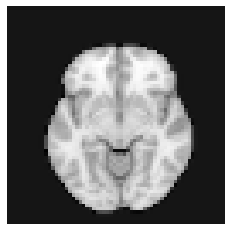

In [2]:
#Plot the pretty brain we are working on
plt_background()

In [3]:
fmri_data, stimuli, masker = load_and_mask_miyawaki_data()

Preprocessing data...

Preprocessed fMRI data: 2860 samples x 5438 voxels
Preprocessed stimuli data: 2860 samples x 100 pixels


 Done (13.89s).


## First step: Decoding


Let's infer the binary visual stimulus presented to the subject from the recorded fMRI data.

Simple classification: X = fMRI data, y = binary stimuli

As done in Abraham et al., we first use a l1 logistic regression

Issue: the article is from 2014, so some of the code is deprecated: need to correct it

In [4]:
"""from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

pipeline_LR = Pipeline(steps=[('selection', SelectKBest(f_classif, k=500)),('clf', LR(penalty='l1', C=0.05))])

scores_lr = []
# y_train = n_samples x n_voxels
# To iterate on voxels, we transpose it. 
for pixel in tqdm(y_train.T):
    score = cross_val_score(pipeline_LR, X_train, pixel, cv=5)
    scores_lr.append(score)"""

"from sklearn.linear_model import LogisticRegression as LR\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.feature_selection import SelectKBest, f_classif\n\npipeline_LR = Pipeline(steps=[('selection', SelectKBest(f_classif, k=500)),('clf', LR(penalty='l1', C=0.05))])\n\nscores_lr = []\n# y_train = n_samples x n_voxels\n# To iterate on voxels, we transpose it. \nfor pixel in tqdm(y_train.T):\n    score = cross_val_score(pipeline_LR, X_train, pixel, cv=5)\n    scores_lr.append(score)"

In [4]:
from sklearn.model_selection import train_test_split

train_to_test_ratio = 0.8
X_train, X_test, Y_train, Y_test =train_test_split(fmri_data, stimuli, 
                                        train_size=train_to_test_ratio, 
                                        test_size=1.0-train_to_test_ratio)

In [8]:
from sklearn import linear_model

C_list = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]


train_accuracy, test_accuracy = np.zeros(100), np.zeros(100)
# loop over regularisation strength
for i,pixel in tqdm(enumerate(np.transpose(Y_train))):
    
    # define logistic regressor
    logreg=linear_model.LogisticRegression(penalty='l2', C=0.05, max_iter = 1000)
    
    # fit training data
    logreg.fit(X_train, pixel)
    
    # check accuracy
    train_accuracy[i]=logreg.score(X_train,pixel)
    test_accuracy[i]=logreg.score(X_test,np.transpose(Y_test)[i])
    
    print('accuracy: train, test')
    print('liblin: %0.4f, %0.4f' %(train_accuracy[i],test_accuracy[i]) )

1it [00:07,  7.36s/it]

accuracy: train, test
liblin: 1.0000, 0.7902


2it [00:14,  7.15s/it]

accuracy: train, test
liblin: 1.0000, 0.8269


3it [00:23,  8.18s/it]

accuracy: train, test
liblin: 1.0000, 0.8252


4it [00:30,  7.80s/it]

accuracy: train, test
liblin: 1.0000, 0.7885


5it [00:37,  7.37s/it]

accuracy: train, test
liblin: 1.0000, 0.8112


6it [00:44,  7.33s/it]

accuracy: train, test
liblin: 1.0000, 0.8024


7it [00:51,  7.26s/it]

accuracy: train, test
liblin: 1.0000, 0.7797


8it [00:58,  7.12s/it]

accuracy: train, test
liblin: 1.0000, 0.8094


9it [01:07,  7.52s/it]

accuracy: train, test
liblin: 1.0000, 0.8252


10it [01:16,  8.01s/it]

accuracy: train, test
liblin: 1.0000, 0.8059


11it [01:24,  7.96s/it]

accuracy: train, test
liblin: 1.0000, 0.7937


12it [01:31,  7.72s/it]

accuracy: train, test
liblin: 1.0000, 0.8269


13it [01:38,  7.59s/it]

accuracy: train, test
liblin: 1.0000, 0.8357


14it [01:45,  7.36s/it]

accuracy: train, test
liblin: 1.0000, 0.8269


/home/marie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
15it [01:56,  8.48s/it]

accuracy: train, test
liblin: 1.0000, 0.8147


16it [02:03,  7.93s/it]

accuracy: train, test
liblin: 1.0000, 0.8444


17it [02:09,  7.53s/it]

accuracy: train, test
liblin: 1.0000, 0.8584


18it [02:16,  7.40s/it]

accuracy: train, test
liblin: 1.0000, 0.8374


/home/marie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
19it [02:27,  8.51s/it]

accuracy: train, test
liblin: 1.0000, 0.7990


20it [02:35,  8.14s/it]

accuracy: train, test
liblin: 1.0000, 0.8112


21it [02:40,  7.19s/it]

accuracy: train, test
liblin: 1.0000, 0.7990


22it [02:48,  7.54s/it]

accuracy: train, test
liblin: 1.0000, 0.8654


23it [02:56,  7.67s/it]

accuracy: train, test
liblin: 1.0000, 0.8514


24it [03:05,  7.93s/it]

accuracy: train, test
liblin: 1.0000, 0.8689


25it [03:11,  7.62s/it]

accuracy: train, test
liblin: 1.0000, 0.8794


26it [03:21,  8.28s/it]

accuracy: train, test
liblin: 1.0000, 0.8531


27it [03:27,  7.66s/it]

accuracy: train, test
liblin: 1.0000, 0.8566


/home/marie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
28it [03:38,  8.66s/it]

accuracy: train, test
liblin: 1.0000, 0.8479


29it [03:45,  7.97s/it]

accuracy: train, test
liblin: 1.0000, 0.8199


30it [03:52,  7.71s/it]

accuracy: train, test
liblin: 1.0000, 0.8339


31it [04:00,  7.88s/it]

accuracy: train, test
liblin: 1.0000, 0.8217


32it [04:07,  7.61s/it]

accuracy: train, test
liblin: 1.0000, 0.8392


/home/marie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
33it [04:19,  8.73s/it]

accuracy: train, test
liblin: 1.0000, 0.8724


34it [04:22,  7.28s/it]

accuracy: train, test
liblin: 1.0000, 0.9056


/home/marie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
35it [04:33,  8.41s/it]

accuracy: train, test
liblin: 1.0000, 0.9213


36it [04:40,  7.70s/it]

accuracy: train, test
liblin: 1.0000, 0.9336


/home/marie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
37it [04:51,  8.68s/it]

accuracy: train, test
liblin: 1.0000, 0.9248


38it [04:58,  8.39s/it]

accuracy: train, test
liblin: 1.0000, 0.8479


39it [05:03,  7.30s/it]

accuracy: train, test
liblin: 1.0000, 0.8689


40it [05:13,  8.08s/it]

accuracy: train, test
liblin: 1.0000, 0.8427


41it [05:21,  7.98s/it]

accuracy: train, test
liblin: 1.0000, 0.8479


/home/marie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
42it [05:32,  9.12s/it]

accuracy: train, test
liblin: 1.0000, 0.8706


/home/marie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
43it [05:44,  9.80s/it]

accuracy: train, test
liblin: 1.0000, 0.9073


/home/marie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
44it [05:55, 10.25s/it]

accuracy: train, test
liblin: 1.0000, 0.9615


45it [06:01,  9.00s/it]

accuracy: train, test
liblin: 1.0000, 0.9860


46it [06:09,  8.79s/it]

accuracy: train, test
liblin: 1.0000, 0.9878


/home/marie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
47it [06:21,  9.63s/it]

accuracy: train, test
liblin: 1.0000, 0.9668


48it [06:29,  9.23s/it]

accuracy: train, test
liblin: 1.0000, 0.9353


/home/marie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
49it [06:41, 10.06s/it]

accuracy: train, test
liblin: 1.0000, 0.8951


50it [06:49,  9.23s/it]

accuracy: train, test
liblin: 1.0000, 0.8409


51it [06:58,  9.37s/it]

accuracy: train, test
liblin: 1.0000, 0.8514


52it [07:05,  8.67s/it]

accuracy: train, test
liblin: 1.0000, 0.8724


53it [07:14,  8.63s/it]

accuracy: train, test
liblin: 1.0000, 0.9056


/home/marie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
54it [07:26,  9.63s/it]

accuracy: train, test
liblin: 1.0000, 0.9563


55it [07:34,  9.29s/it]

accuracy: train, test
liblin: 1.0000, 0.9895


56it [07:38,  7.62s/it]

accuracy: train, test
liblin: 1.0000, 0.9948


57it [07:49,  8.50s/it]

accuracy: train, test
liblin: 1.0000, 0.9825


58it [07:54,  7.65s/it]

accuracy: train, test
liblin: 1.0000, 0.9336


59it [08:01,  7.49s/it]

accuracy: train, test
liblin: 1.0000, 0.8934


60it [08:09,  7.41s/it]

accuracy: train, test
liblin: 1.0000, 0.8811


61it [08:16,  7.29s/it]

accuracy: train, test
liblin: 1.0000, 0.8479


62it [08:23,  7.34s/it]

accuracy: train, test
liblin: 1.0000, 0.8759


63it [08:29,  6.91s/it]

accuracy: train, test
liblin: 1.0000, 0.8794


64it [08:37,  7.13s/it]

accuracy: train, test
liblin: 1.0000, 0.9056


/home/marie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
65it [08:48,  8.39s/it]

accuracy: train, test
liblin: 1.0000, 0.9563


66it [08:53,  7.47s/it]

accuracy: train, test
liblin: 1.0000, 0.9615


67it [08:59,  7.03s/it]

accuracy: train, test
liblin: 1.0000, 0.9196


68it [09:10,  7.98s/it]

accuracy: train, test
liblin: 1.0000, 0.8759


69it [09:16,  7.54s/it]

accuracy: train, test
liblin: 1.0000, 0.8601


70it [09:23,  7.48s/it]

accuracy: train, test
liblin: 1.0000, 0.8252


71it [09:31,  7.41s/it]

accuracy: train, test
liblin: 1.0000, 0.8164


72it [09:37,  7.21s/it]

accuracy: train, test
liblin: 1.0000, 0.8129


/home/marie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
73it [09:49,  8.39s/it]

accuracy: train, test
liblin: 1.0000, 0.8409


74it [09:56,  8.23s/it]

accuracy: train, test
liblin: 1.0000, 0.8304


75it [10:02,  7.59s/it]

accuracy: train, test
liblin: 1.0000, 0.8864


76it [10:10,  7.58s/it]

accuracy: train, test
liblin: 1.0000, 0.8357


77it [10:17,  7.32s/it]

accuracy: train, test
liblin: 1.0000, 0.8304


78it [10:24,  7.34s/it]

accuracy: train, test
liblin: 1.0000, 0.8269


79it [10:31,  7.24s/it]

accuracy: train, test
liblin: 1.0000, 0.8269


80it [10:40,  7.64s/it]

accuracy: train, test
liblin: 1.0000, 0.8217


81it [10:47,  7.63s/it]

accuracy: train, test
liblin: 1.0000, 0.8077


82it [10:52,  6.85s/it]

accuracy: train, test
liblin: 1.0000, 0.8217


83it [11:00,  6.96s/it]

accuracy: train, test
liblin: 1.0000, 0.8217


84it [11:08,  7.30s/it]

accuracy: train, test
liblin: 1.0000, 0.8182


85it [11:15,  7.31s/it]

accuracy: train, test
liblin: 1.0000, 0.8287


86it [11:22,  7.19s/it]

accuracy: train, test
liblin: 1.0000, 0.8392


87it [11:27,  6.47s/it]

accuracy: train, test
liblin: 1.0000, 0.8392


88it [11:37,  7.48s/it]

accuracy: train, test
liblin: 1.0000, 0.8164


/home/marie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
89it [11:48,  8.66s/it]

accuracy: train, test
liblin: 1.0000, 0.8182


90it [11:55,  8.19s/it]

accuracy: train, test
liblin: 1.0000, 0.8269


91it [12:02,  7.88s/it]

accuracy: train, test
liblin: 1.0000, 0.8007


92it [12:11,  8.11s/it]

accuracy: train, test
liblin: 1.0000, 0.7867


93it [12:18,  7.77s/it]

accuracy: train, test
liblin: 1.0000, 0.8094


94it [12:29,  8.82s/it]

accuracy: train, test
liblin: 1.0000, 0.8164


95it [12:38,  8.79s/it]

accuracy: train, test
liblin: 1.0000, 0.8024


96it [12:43,  7.60s/it]

accuracy: train, test
liblin: 1.0000, 0.8217


97it [12:50,  7.62s/it]

accuracy: train, test
liblin: 1.0000, 0.8392


98it [12:58,  7.54s/it]

accuracy: train, test
liblin: 1.0000, 0.8042


99it [13:05,  7.51s/it]

accuracy: train, test
liblin: 1.0000, 0.8024


100it [13:15,  7.95s/it]

accuracy: train, test
liblin: 1.0000, 0.8077


In [17]:
image = np.zeros(100)

for pixel in image :
    y = logreg.predict(X_test[0])
    y = y.reshape(10,10)

ValueError: Expected 2D array, got 1D array instead:
array=[-6.51087433e+00 -5.49807872e+00 -1.32264073e+01  7.14546334e+00
 -3.36726730e+00  2.31984925e+00  2.43907409e+00 -5.12652135e+00
 -3.08766522e+00  9.69403004e+00 -1.56313186e+01  2.70955572e+00
 -8.90822202e-01  1.90814778e+00  1.17706314e+01  1.01331213e+01
 -1.14980160e+00 -7.37644504e-01 -5.60737693e+00  5.36796556e+00
 -1.92297529e+01 -2.62405741e+00 -2.86283957e+00  2.88054963e+00
 -1.94749646e+00  6.76703270e+00 -1.23314496e+01  1.65550816e+01
  8.06807311e+00 -1.69829532e+00 -1.62473703e+00 -2.71801944e+00
 -1.04172344e+01 -1.23090781e+01 -1.21151303e+01  1.25880787e+01
 -1.57037328e-01  5.74476925e-01 -1.83811257e+00 -2.25028141e-01
 -1.20698840e+01 -4.93603441e+00 -1.46789184e+00  2.08186888e+00
 -8.43140495e+00  1.05352040e+01  1.71922171e-01 -2.30746412e+00
 -3.34850291e+00 -5.00496790e+00 -2.67925262e+00 -3.55872800e+00
  4.23689700e+00  1.70660372e+00  6.99029785e+00 -3.98311650e+00
  1.23630600e+01 -6.74284680e+00 -3.44064088e-01  1.27739821e+00
 -8.74069698e+00 -7.80395456e+00 -7.04574337e-01 -2.63578487e+00
 -4.81250467e+00  7.74329535e+00 -1.09094972e+01  6.89013546e+00
  5.79669057e+00  7.64777966e-01  6.01667048e+00  4.50559384e+00
 -5.42679279e+00 -8.06663997e-01 -4.01176001e+00 -3.11636562e+00
 -1.33606930e+01  2.90746768e+00  3.57167423e+00  2.09992935e+01
 -3.71276381e+00 -6.52259831e+00 -9.21399828e-01 -9.05722510e+00
 -3.93945608e+00  7.63217590e+00 -1.02425429e+01 -7.85976503e+00
  8.72598396e+00 -4.44673419e+00  1.61694711e+00 -1.91011588e+00
  6.57050265e-01  7.13957117e+00 -3.31138513e+00 -1.07632797e+00
 -4.09563116e+00  2.67569724e+00 -6.15878028e-01  2.98801772e+00
  8.48831040e+00 -2.87175935e+00 -5.56713250e+00 -1.19440106e+01
 -1.07094827e+01 -4.20503847e+00 -1.46696233e+01 -1.24920939e+01
 -1.13305458e+01  5.27944835e+00 -5.81795538e+00 -9.78395081e-01
 -9.07368058e+00  3.49477019e+00 -4.65909442e+00  1.57409971e+01
 -5.26723815e+00  6.26758426e+00 -1.89118344e+00  7.94148865e-01
 -4.16102920e+00 -5.85563836e+00 -1.03949576e+00 -3.00374261e+00
 -1.00831028e+00 -4.96159009e+00 -1.53946591e+01 -1.27196051e+01
  1.54557245e+01  2.77908447e+00  7.14520118e-02  7.92205604e+00
 -8.95729587e+00  1.43244352e+00  4.29360811e+00  7.15684991e-01
 -5.01257872e+00 -5.31649254e+00 -1.06660919e+01 -4.73934833e+00
 -3.87151605e+00 -5.89301389e-01 -5.88074340e+00  2.67771216e+00
 -1.65153261e+00  5.48898574e+00 -7.57086972e+00 -1.00792360e+01
 -1.03501599e+01 -1.07096736e+01 -7.98337661e+00  3.29868373e+00
 -7.89933705e+00 -7.20393216e+00  5.93697474e+00 -1.33270520e+01
 -1.95410657e+01 -3.54156338e+00 -6.01242962e+00 -1.56041890e+00
  1.02550558e+01  3.79213251e+00 -3.57314126e+00 -7.84793414e+00
 -4.26433541e+00 -9.78852168e+00  1.22678041e+01 -6.44842330e-01
 -7.47012651e+00 -8.69979233e+00  4.51262437e+00  2.58943052e-01
 -2.02970008e+00  4.66030699e-01  4.59197343e+00  6.41232734e-01
 -3.20472496e+00 -8.25019026e-01  7.57784612e+00 -2.64661679e+00
  1.03532211e+01 -9.85597102e+00 -6.17300188e-01  2.82071991e+00
 -8.96084675e-01 -6.15569903e+00 -5.21506945e+00 -3.47479359e+00
  3.39944781e+00 -6.76574293e+00  1.03384283e+01 -2.48726242e+00
  1.63894259e+01  3.00381807e+00 -1.97032492e+00 -2.76390888e+00
  3.25463044e+00 -6.57111057e+00 -1.13815186e+01  6.60151602e+00
  5.31554031e+00 -4.96583893e+00 -7.60173189e+00  4.80978033e+00
  1.10181005e+01  1.97213369e+01 -1.33572118e+00  2.70515906e-01
  3.06965084e+00 -4.98433160e+00 -6.10390074e+00 -4.68103692e+00
 -6.92554782e+00  2.29931254e+00  3.89880977e+00  1.68364705e+01
 -7.20716688e+00 -8.11213371e+00 -1.77965083e+01  3.36186365e+00
 -4.79982041e+00 -6.70078190e+00  1.35079559e+00 -6.07183567e-01
  3.26762419e+00 -6.33424821e+00  2.53176829e+00 -1.10266782e+01
 -5.17554136e+00 -8.26334304e+00 -6.67113990e+00 -5.44428250e-01
 -4.99150756e+00 -2.69611536e+00 -1.11156971e+01  6.56263905e+00
  7.69230393e+00 -7.53452736e-02 -4.10419747e+00  6.04421348e+00
  6.68517477e+00 -8.81900023e-01  9.49197411e-01  2.88746370e+00
 -1.23956559e+01 -2.11959967e+01  2.82820709e+00 -7.04541747e+00
  5.11503230e+00  5.88939104e-01  5.82020627e-01 -1.14242312e+01
 -2.63273618e+00 -6.53120176e+00 -2.23385452e-01 -1.05855858e+01
 -7.59337986e+00  8.72456627e+00 -1.94026327e+00  8.92886505e+00
 -8.18487579e+00  1.75817129e+01 -8.17355874e+00 -8.31703458e-01
  8.45814822e+00 -2.09023773e+00  6.02144732e+00 -3.65486145e+00
  3.34530685e+00  1.49384477e+01 -3.19731606e+00  6.95789023e+00
  3.83329709e+00 -1.64937226e+01 -7.17409330e+00  6.49849055e+00
  4.14919640e+00 -1.50959168e+00  1.23291982e+00  2.14434134e+01
  5.95236511e+00  8.48086735e+00  5.28080987e+00  8.35456454e+00
 -8.03747894e+00 -1.05912381e+01 -8.47788035e+00 -4.99962893e+00
 -8.84271774e+00 -4.21508793e+00 -7.09893958e+00  6.76466549e+00
  3.55375157e-01 -3.06884387e-01 -5.86300499e-01 -5.63929739e+00
  4.27361215e+00  1.09582877e+01 -8.29636106e+00  2.60922861e+00
 -1.32419228e+01 -8.74363314e+00 -8.93674729e+00  3.77367239e+00
 -1.05603158e+01  2.87054452e+00 -2.75762766e+00  1.40040999e+01
  3.40515755e+00  6.34406654e-01  8.86112326e-01  2.38706567e-01
 -7.61418246e+00 -1.11533140e+01 -1.46584330e+00 -8.40072237e+00
  2.40343194e+00  3.17964061e+00 -1.38762909e+00 -8.40253350e+00
  4.99118989e+00  2.75494635e-01 -2.80047271e+00  2.79272209e+00
  3.93956879e+00 -4.41503215e-01 -9.07795761e+00  5.61935703e+00
 -3.68649308e+00  1.05869896e+01 -3.18931235e-02 -7.21320286e+00
  9.74933802e+00  1.17796283e+00  3.88557237e+00 -3.65683421e+00
 -6.16955576e+00  3.48192575e+00  7.29805324e+00 -2.09721184e+00
  5.76010631e+00  3.03766619e+00 -1.67799503e+00  9.25341107e+00
 -1.35904416e+00  2.32350503e+01  2.94854368e+00  4.34251999e+00
 -3.23720249e+00 -3.57540658e+00  6.92536973e+00  1.61370198e+00
 -1.94395748e+01 -6.70577354e+00  6.63143182e+00  3.13967822e+01
  3.49770068e+00  1.69799439e+01  6.81492748e+00 -1.21529886e+01
  6.16913777e-01 -1.03960067e+00 -1.31688689e+01 -1.59475742e+00
  7.99942641e+00  1.36568687e+01  2.61745779e+00  1.19085316e+01
 -2.25175146e+01  1.78701445e+00 -2.73025114e+00  3.00961439e+00
 -1.34092757e+01 -7.67357724e-01 -2.98566265e+00 -8.71505646e+00
 -2.17765703e+00 -5.69235729e-01  1.11930293e+01  5.50071989e+00
  8.12742307e-01 -4.90506199e+00  7.31596831e-01 -7.93384314e+00
  1.16698370e+01  3.39393919e+00  8.48394144e+00  3.71925304e+00
  3.65604962e+00  5.74450405e+00 -6.71869445e+00 -1.86507396e+01
  7.06654494e+00 -1.76586897e+00  3.37442980e+00 -2.76251477e+00
 -7.05122388e+00  8.29218626e+00 -5.86257532e+00 -1.87522417e+01
 -2.32453086e+00  7.18829171e+00  2.34678530e+00 -2.79720047e+00
  6.55516918e-01 -3.39720416e+00 -1.54369058e+01  7.30829028e+00
 -4.45984043e+00  5.98732532e+00  1.05228544e+00  4.23190354e+00
 -6.33112881e+00 -4.73323947e+00  5.21921518e-01  8.00778726e+00
 -1.27997158e+01  4.08433094e+00  8.96954895e-01 -1.00115658e+00
 -1.17629970e+00 -2.25088746e+00  9.72421744e+00 -5.10723307e+00
 -2.65769905e+00 -4.22598142e+00  1.83128522e+00 -2.88848966e+00
 -9.62012326e+00  1.01132170e+01  6.52260693e+00 -1.19490593e+01
 -7.35296062e+00  4.38578706e+00 -8.69580956e+00 -9.39937353e+00
  4.05486430e+00 -3.80365958e+00 -3.38767205e+00 -1.05636329e+01
 -4.06909334e+00  1.39911835e+00 -3.59433488e+00 -3.55301049e+00
  1.57403361e+00 -2.61895959e+00  1.57624013e+01 -6.97263188e-01
  1.01585787e+01  6.49395113e-01  7.43097208e+00  4.16428219e+00
  1.04796007e+01  3.00273652e-01  6.01757407e+00  4.13549398e+00
  8.79019269e+00 -6.28196528e+00  7.50540117e+00  6.86274130e+00
  3.42341071e+00 -7.44190569e+00 -6.50063313e+00  4.66841924e+00
  9.87774088e+00  9.82441054e+00 -1.17759709e+00 -2.65108239e+00
 -2.09878512e+01 -6.27677045e+00 -2.00045631e+01 -6.57901390e+00
  2.11896724e+00  9.80846933e-02 -9.80185664e+00 -1.57777982e+01
 -8.23455453e-01  3.86453892e+00  1.44501756e+01 -7.61554687e+00
 -8.53124332e+00 -1.50220410e+01  3.31936224e+00  1.01755125e+01
  9.19029860e+00  1.50590526e+01 -6.56610350e+00  1.59363580e+00
 -3.10889694e+00 -5.72192962e+00  1.18644659e+00  1.24272623e+00
  1.29280495e+01  6.90947029e+00  6.43878039e+00 -1.23687896e+01
  2.02887860e+00  2.78391120e+00 -5.75808098e+00 -2.36001083e+00
  8.10867789e+00  1.50266209e+01 -5.01393289e+00  5.87289740e-01
  4.28201857e+00 -1.03623149e+01 -4.07175593e+00 -1.45267152e+01
  2.84998622e+00  1.13185239e-01  1.52294281e+01  8.82254177e+00
  3.57035554e+00  1.03365939e+00 -1.08982900e+01 -3.80805022e+00
  1.43541350e+01  9.20159088e+00 -3.32984914e-01 -1.15302857e+00
  3.02949054e+00 -3.40159604e+00 -1.15420192e+01 -1.17482300e+01
  7.85070100e+00  4.28817467e+00 -1.15000926e+00 -3.16864928e+00
 -8.29211528e+00  5.06849693e+00  1.46093887e+00 -1.32833006e+01
 -1.89392180e+01  3.80864700e+01  1.38716312e+01  3.62253135e+00
  8.86414712e+00  1.36340686e+01  1.41908540e+01 -2.31873973e+00
  3.22986631e+00 -8.04504185e+00 -6.50596467e+00  2.18743794e+00
  5.92464168e+00 -1.09332402e+01 -6.91575718e+00 -5.10512836e+00
  4.31922437e+00  5.81780566e+00 -3.05702612e+00  4.32219792e-01
 -2.50311260e+00 -2.91275695e+00 -2.23545375e+00 -4.35238780e+00
 -1.57055040e+01 -2.48233177e+00  1.99721692e+00 -6.22722380e+00
  1.41498726e+00  2.23159672e-01  3.04935206e+00 -5.99924487e+00
  7.92542530e+00 -5.47051730e+00  2.95891420e-01 -1.86537548e+00
  2.66845513e+00  5.44212672e+00  6.60922654e+00 -9.61478325e+00
  3.75479389e+00  3.49771499e+00  1.70327649e+01  9.86130899e+00
  5.44751853e+00  1.47038221e+00  1.76496516e+00 -5.22946574e+00
  1.85758491e+00 -5.24943110e-01  2.55616738e+00  5.42592533e+00
 -1.81667121e+01 -1.19115564e+01 -1.88025972e+00 -1.00442830e+00
 -8.88265546e+00 -2.51353198e-01 -5.54026706e-02 -7.21801337e-01
 -9.37555016e+00  1.11964813e+01  1.10050927e+01 -2.57636181e+00
 -9.40515620e+00  3.01634634e+00 -1.24191581e+01 -3.48362379e+00
 -2.92863865e+00 -9.56754408e-01 -5.02381863e+00 -5.34849881e+00
  2.61887208e+00 -7.51298268e+00 -4.33570706e+00  1.24107321e+01
  6.49550789e+00  9.69262377e+00  1.36558956e+00 -3.40569249e+00
  4.23552848e+00  2.25814223e+01  1.01118373e+01  2.81087353e+00
 -5.27412673e+00 -9.22415037e+00 -2.82258443e+00 -4.61332350e+00
 -1.31150770e+00  2.11821820e-01  9.21896833e+00  5.84763132e-01
 -5.23466957e+00 -2.20627382e+00  1.31341315e+00  4.46137701e+00
 -3.78233408e-01  1.37087866e+01  9.93328296e-01  8.56083224e+00
  2.20260364e+00 -2.72611913e+00 -1.43057167e+01 -1.67374504e+00
 -4.10924002e+00  6.44735589e+00  8.87446002e+00  9.31078060e+00
  2.25721862e+00 -7.08243170e+00 -4.62797245e-01  4.96450231e+00
 -7.06260200e+00 -1.26312120e+01  4.95674385e+00 -1.59519955e+01
 -1.42733363e+01  7.48639394e-01 -3.57182396e+00 -1.51211454e+00
 -2.80501739e+00 -6.52323261e+00 -3.99128319e+00  2.99808327e+00
 -3.36498698e+00  8.31086749e+00  6.98729225e+00  1.90670331e+01
 -2.15672276e+00  7.57404964e+00  3.45140361e-01  2.86631092e+00
 -6.32330049e-01  2.65952173e+00  3.28853725e-01  1.17157672e+01
  1.35809390e+01  2.88541050e+01 -7.82989144e+00 -4.67488394e+00
 -1.22318523e+01 -1.26242948e+00 -4.74792483e+00 -1.74254602e+01
  2.18293045e+00 -4.77422220e+00  1.56362574e+00 -2.15676170e+00
 -3.54171651e+00 -8.73954221e+00 -4.07311846e+00  6.54210030e+00
  4.41940720e+00  1.77160940e+00 -2.15270559e+00 -1.12398353e+00
 -3.65631480e+00 -9.76747649e+00  7.29100575e+00 -3.92151727e+00
 -4.01358857e+00  3.75961940e+00 -9.43254404e+00  1.97428032e+00
  1.79737891e-01 -8.93489584e-01 -4.75934706e+00  1.16136316e+01
 -1.58557317e+01 -9.85835940e+00 -1.57546864e+00 -9.01822661e+00
  1.04940421e+01  1.40269725e+00  2.58675321e+00 -9.56604890e+00
 -1.85590348e-01 -1.56254985e+01  1.47452448e+00 -2.07823951e+01
  2.83145455e+00 -2.73687510e+00  5.29229009e-01  3.47277032e+00
 -1.80851104e+01  3.69723132e+00 -7.42822148e+00 -1.29918298e+01
 -3.69517332e+00 -6.60272642e+00 -1.66981034e+00 -5.55504454e+00
 -2.76685460e+01 -4.12988569e+00  3.75600652e+00  1.43138632e+01
 -4.28004464e+00 -9.31395007e+00 -6.91568070e+00 -4.56867685e+00
  6.06007074e+00 -5.18168490e+00 -1.87725275e+01 -1.33042445e+01
  7.54035855e+00 -4.37104641e+00 -8.23441628e+00  1.88752869e+01
 -1.17638436e+01  7.69943380e+00 -7.63393426e-01 -4.28384176e+00
  2.14137634e+00  9.77542946e+00  6.98511246e+00 -5.39757115e+00
 -8.63875448e+00  1.62350828e+01 -4.37128639e-01  4.88848651e-01
 -7.23643315e+00 -7.47214982e+00  5.34853698e+00 -2.14313923e-01
 -7.31279914e+00 -8.46003700e+00  5.68646361e+00  7.21334090e+00
 -7.75349479e+00 -1.94775700e+00 -7.08023552e+00 -2.33841700e+00
  1.73313240e+01  1.30823493e+01  6.41964746e-01 -9.99780954e-01
  3.37321313e+00 -2.46126694e+00 -5.96123593e+00 -1.05178334e+01
 -4.86464859e+00  2.40663503e+00  7.69066000e-01  1.54453816e+00
  8.15861622e+00  7.64896201e+00  4.59591200e+00 -8.98440516e-02
 -9.39241074e+00  6.93379124e+00  6.51672742e+00 -1.16086396e+01
 -9.85821105e+00 -8.99672504e+00 -1.62842421e+01 -2.24420767e+00
 -3.87828010e+00 -8.26772054e+00  9.25703238e+00 -6.91499000e-03
 -2.99951833e+00  1.42092935e+00 -2.10348004e+00 -9.39547394e+00
 -6.96832622e+00  5.32479708e-01 -7.97672752e+00 -7.90891536e+00
 -1.34994213e+00 -1.53753162e+00  3.36915422e+00 -6.22779906e+00
 -1.60624423e+00 -1.37138012e+01 -9.52775921e+00 -5.08277013e-01
  6.19299691e+00  3.40124734e-01  1.54394877e+01  4.81078789e+00
 -1.01351010e+00 -1.23387873e+00  1.49981749e+01 -5.99623666e+00
  1.03277252e+00  5.96203315e+00  5.16658036e+00 -6.92231392e+00
 -1.60062820e+01 -7.45262498e+00 -7.54941587e+00 -9.82512582e+00
 -2.11130434e-01  3.22611995e+00  3.22001519e+00  2.13563820e+01
 -1.22417871e+01  1.37037993e+00 -2.15601038e+00  7.48281687e+00
  9.70746270e+00 -1.50432149e+00 -7.97054126e+00 -4.07168499e+00
  1.15138482e+01 -1.59578013e+01 -3.80763472e+00  6.97848883e+00
  2.30825614e+00 -2.23461967e-01 -1.31838212e+01 -5.63037759e+00
  4.39734096e+00 -5.84198332e+00  1.11741193e+01  1.12809586e+01
  1.09811884e+01 -1.04224540e+01 -2.82246098e+01 -1.56012147e+01
 -2.75419192e+00 -9.46532361e+00  2.18412662e+00  3.18068595e-01
  1.09464075e+01  2.48061782e+00 -5.50145382e+00 -1.17756086e+01
 -7.68537929e+00  7.21590514e+00  9.02603793e+00  7.62878728e+00
  4.15524871e+00 -7.58463531e+00  1.22710761e+01  3.19512394e+00
 -1.37040593e+01 -2.53772202e+00 -4.90367285e+00  1.92697102e-01
 -9.40251046e+00 -2.60465583e+00 -7.51715485e+00  4.40736388e+00
  9.03107110e-01  1.84842593e+00  6.28029146e-01 -4.07313234e+00
  7.45287510e+00 -7.23170490e+00 -2.35465798e+00 -1.03071330e+01
 -9.14420725e+00 -6.32628584e+00 -1.40039217e+01 -1.00487133e+01
 -2.13119258e+00  1.56871371e+01  5.09647084e+00  4.75389455e+00
 -1.66534447e+01  2.08534551e+00 -2.77346010e+00  1.41118065e+01
  5.65008248e-01 -6.77676868e+00 -7.14080885e+00 -1.30883765e+01
 -1.27948397e+01 -1.15691632e+01 -1.17245782e+01 -1.15709041e+01
 -2.11534092e+00 -2.15663502e+01  5.28119014e+00  3.07596343e+00
 -4.94716085e-01 -2.73364002e+00  3.31761372e+00  2.37201120e+00
 -1.23531307e+01 -1.87461611e+01  3.62252558e+00  5.65933966e+00
 -5.12716996e+00  1.60794397e+01 -1.28302257e+00  1.15357347e+01
 -9.83069315e-01 -3.46021495e+00  5.42279055e+00 -5.29437325e+00
 -4.61256407e-01 -1.07283613e+01 -3.79162189e+00 -5.05952110e+00
  7.22862720e+00  3.36262727e+00 -8.47076514e+00  6.95813803e+00
 -3.86491542e+00 -1.42240954e+01 -5.37824467e+00 -8.95427639e+00
 -4.56430412e+00 -2.74599569e-01  8.06558500e+00  2.20906766e+00
 -1.28497428e+01 -6.11246739e+00 -5.57932631e-01  3.81604169e+00
 -8.61258430e+00 -4.86229618e+00 -1.03450879e+01 -2.24563254e+01
 -1.76960646e+01 -9.63938205e+00  6.53373155e+00 -1.10078342e+00
  1.58146898e+00 -2.64765697e+00 -8.51865966e+00 -8.23166830e+00
 -1.28490556e+01 -3.15420954e+00 -1.28558464e+00 -3.12736589e+00
 -3.24718019e+00 -1.86467561e+01 -1.39300903e+01 -1.21320901e+01
  2.46356204e+00  5.05904801e+00  7.29429629e-01 -6.55765372e-01
  6.35176056e-01 -7.93464065e+00 -9.72458534e+00 -6.26382130e+00
 -1.00496873e+01 -1.64765735e+01 -1.34624823e+01 -1.24004203e+01
 -2.71432241e+00 -3.45752517e+00 -3.12750753e+00  8.09169918e+00
  3.72619318e+00  1.10132370e+01 -7.32464196e-01 -5.04691600e+00
 -2.01221461e+00 -1.57450264e+00  4.71108239e+00 -3.77694549e+00
 -1.04321653e+01 -1.09302505e+01  1.94007352e+00 -2.96522309e+00
  1.94037767e-01  1.07789959e+01  2.47902461e+01 -7.08170999e-01
  5.27239496e+00  2.47230098e-01  5.80667413e+00 -1.47196543e+01
 -1.04087174e+01 -3.71375121e+00 -8.71929396e-01  2.42765067e+01
 -2.82491375e-01  1.34564748e+00  4.71714168e+00  3.79036951e+00
 -5.70714824e+00  1.49584142e-01 -6.03409605e+00 -8.73873359e+00
 -4.28598890e+00 -2.21271451e+00  1.10754676e+01  4.51952560e+00
 -2.05996448e+01 -2.14697987e+01 -1.51100069e+01 -1.14692082e+01
  2.19881535e+00  1.39526753e+01  6.52462404e+00  1.28881012e+01
  2.40324442e+00  2.03847556e+00 -7.71450532e+00  1.26767361e+00
  3.78583747e+00  6.44721154e+00  1.08627138e+01  5.38382910e+00
 -3.47761101e+00  8.79544792e+00 -4.46678085e+00  4.03499152e+00
 -7.50850380e-01  2.63685187e+00 -1.07239106e+01 -5.89331594e+00
  8.18168463e+00  3.11553742e-01 -1.15480236e+01 -9.51284832e+00
  8.07276728e-02 -1.35417861e+01  6.84283691e-01 -5.23199842e-01
  1.18160876e+01 -7.62407593e+00  3.26480205e+00  5.11947358e+00
 -7.60309378e+00 -7.21818901e+00 -2.81443666e+01 -1.97446665e+01
 -3.61707108e+00  3.28080706e+00  6.26217531e+00 -1.61365435e+00
  6.59988554e+00  1.19462903e+01  2.66458737e+00  1.16809233e+01
  7.17558480e+00  5.45829350e+00  1.03889951e+01 -6.13551830e-01
  1.06573412e+01 -1.40592489e+00 -7.61048376e+00 -1.72508857e+01
  3.57158442e+00 -7.31848318e-01 -1.12191371e+01  1.85905428e+00
  5.93594402e+00 -2.09666007e+00 -7.65407873e+00 -2.98777761e+01
 -3.31165452e+01 -1.84641550e+01 -6.74509349e+00  4.56371573e+00
 -1.01278308e+01 -1.38469284e+01 -5.94817135e+00  3.63724435e+00
  9.80970497e-01 -2.02611946e+00 -6.20469500e+00 -7.62104227e+00
 -5.25119488e+00 -9.71224371e+00  1.37560786e+00  9.83889838e+00
  3.00884395e+00  7.69339555e+00 -4.10243063e+01 -1.32551532e+01
 -8.54504622e+00 -1.04155273e+01 -1.02624640e+00 -9.40751784e+00
 -7.38921858e+00 -1.09677789e+00 -2.52355430e+01 -5.55139277e+00
  6.78390676e+00 -4.83185767e-01 -1.59810751e+01  7.22739539e-02
  3.80042533e+00 -1.75703217e+00  9.74510959e-01 -1.75842452e+01
 -2.18433305e+00 -1.64591807e+01 -2.10143674e+01 -4.81590363e+00
 -2.83285852e-01 -2.14177897e+01 -1.42402172e+01 -5.83345146e+00
  4.64419584e+00 -5.73204961e+00 -1.25354453e-01  6.03402542e+00
 -3.26900468e-01 -3.12534918e+00 -8.04489464e-01 -1.79734909e+01
 -7.57328720e+00 -6.97979013e+00 -8.11692583e+00 -1.69414782e+01
 -1.40296662e+01 -7.41069177e-02  2.15052855e+01  1.56305323e-01
 -1.62404610e+00  3.84898657e-01 -5.15548907e+00 -4.32688057e+00
  3.86924379e+00 -8.75160684e-01  1.80437997e+00 -6.00891399e+00
 -1.52116308e+01 -7.17588235e+00  7.64191146e+00  3.75944763e+00
  9.61476584e-01  9.34483373e+00  7.86805927e+00  2.09443631e+00
  4.48909519e+00 -8.03339378e+00 -5.18706275e+00 -2.07452672e+01
 -1.62761987e+01 -1.55026509e+01 -1.31926050e+01  1.28420887e+01
  1.29215708e-01  1.74167884e+00  4.44937321e+00 -1.91494560e+00
 -1.88206758e+01 -1.26823910e+01 -1.14369648e+01  1.63917778e+00
 -1.27924483e+00  8.55512287e+00  8.12826406e+00  1.51744793e+00
 -9.53404341e+00 -1.81952567e+01  8.96766437e-01 -8.36829083e+00
  8.73965250e+00  1.34791039e+01 -3.11160842e+00 -1.04637685e+01
  1.71983803e+00 -2.02423865e+01 -1.80614062e+01  2.26615667e+00
  1.01215288e+01  3.97897196e+00 -7.14081740e+00  1.80281732e+00
  2.53189931e-01  2.44616611e+00 -4.74391143e-01 -1.03149558e+01
 -1.24075430e+01  1.90794151e+00  4.03816121e+00  7.62751259e-01
 -7.46763686e+00 -1.90969219e+01 -1.10249977e+01  2.93651821e+00
 -7.85235520e+00 -9.74103729e+00  9.37238291e+00 -1.96738949e+00
 -1.94850752e+00 -2.50064967e+00 -8.54047124e+00  6.92655983e+00
 -5.36235202e+00  1.28260144e+01  6.53725020e+00 -7.65857341e+00
 -8.71696435e+00  2.39718170e-01  4.73717203e+00  1.99082654e+00
 -3.53438491e-01 -1.44657660e+01 -1.79712493e+01 -2.84000099e+00
 -1.60205700e+01 -8.61348789e-01  1.38639723e+00 -3.59374656e+00
 -6.75532241e+00 -5.01220208e+00 -1.40247438e+01 -2.53913663e+01
 -1.11182130e+01 -2.48826756e+01 -2.37756500e+01  3.67487095e+00
 -1.88237754e+01 -6.06487351e+00  1.77344504e-01 -2.64490575e+00
 -5.95054510e+00 -1.11586227e+01 -8.78036578e+00 -1.46329924e+01
 -5.56888500e+00 -1.33001548e+01 -2.34442057e+01 -3.93034240e+01
 -5.85557555e-01  1.13620041e+01  1.54947981e+01  1.52200659e+01
  2.64732240e+00 -2.18854893e+00 -1.40568843e+00 -2.75471033e+01
 -2.73056674e+01 -4.08025918e+00 -1.55230599e+01 -9.56149561e+00
 -5.87915365e+00  8.91164084e+00 -4.10022766e+00  3.32605099e+00
 -6.10565888e-01  8.47204429e-01 -7.59211457e+00 -1.06107896e+01
 -1.63295194e+01 -1.33152937e+01 -1.50434694e+01 -5.19652462e+00
 -1.13825647e+01 -6.43946254e+00  1.48191713e+01  2.79642688e+00
  8.12655543e+00  2.16805853e+01  1.82068824e+00 -4.10877066e+00
  1.00227465e+00 -6.43996476e+00 -2.06960172e+01 -2.74333378e+01
 -7.18273989e+00 -5.85686451e+00 -2.31127012e+00  1.21315491e+01
 -1.46812111e+00 -7.34573170e+00 -8.02573871e+00  1.09702585e+00
  8.67116137e+00  6.79848935e+00  1.11823569e+00  7.63793784e+00
 -3.83757308e+00  5.64311210e+00  5.52625698e+00 -1.66355530e+01
 -2.11325228e+01 -9.49814617e+00  3.43884584e-01  4.22759710e-01
 -5.77490736e+00 -1.94875554e+00  6.57111781e+00  2.30496150e+00
 -4.72923422e+00 -7.66143446e-01 -4.21822788e+00 -2.02698923e+01
 -1.17262201e+01 -1.29327642e+01 -1.24765337e+01  7.87505820e+00
 -1.03245785e+01 -4.20674442e+00  9.76910352e+00 -2.55536949e+00
  1.45083776e+00 -2.71306700e+00 -1.21572511e+01  3.72242491e+00
 -7.02101243e-02 -1.67950173e+01  2.88022996e+00  1.67238231e+01
 -2.75772686e+00  5.84451122e+00 -6.64812345e+00 -7.88274261e-01
 -7.43695300e+00  1.95897462e+00 -1.11898367e+01 -8.31655972e-01
 -1.88142041e+00  3.92619016e+00  9.94010489e-01 -2.55985861e-01
 -1.83104002e+00 -8.55638877e+00 -2.19061144e+00  8.00989331e+00
 -1.15410177e+00 -1.57577506e+00 -6.66829543e+00  4.62120891e+00
 -7.56170591e+00 -1.99602822e+00 -3.71466303e+00 -8.25771869e+00
  4.37766794e-01  4.09044782e+00 -8.08591299e+00 -9.35429239e+00
 -7.11884402e+00 -1.61128720e+01 -9.02712069e+00 -1.76462153e+01
 -1.01066331e+01  1.85813710e-01 -2.18188879e+01 -6.09485110e-02
  8.85847650e+00  1.04663404e+01  2.15255199e+00  1.12727460e+01
  1.41954868e+00  1.01098813e+01 -1.53085474e+01  8.53000413e+00
 -3.28220613e+00 -8.57088840e-01 -6.02655017e+00 -8.92042807e-01
 -6.24766105e+00 -1.69324886e+01 -4.13627686e+00 -1.16769420e+01
 -1.23295035e+01 -1.98526086e+01  3.31387282e+00 -6.99738547e+00
 -2.18250687e+00  7.36907478e-01  7.40563019e+00  4.17797078e+00
 -4.72486572e+00 -1.37967302e+01 -6.80575908e+00 -1.73765800e+01
 -1.79653518e+01 -8.21974661e+00 -2.42622490e+01 -4.53067524e+00
 -1.30171348e+01 -2.44784344e+00 -1.94712877e+00 -6.31975887e+00
 -3.31039805e+01  1.09638038e+01 -5.57035427e+00 -1.27267755e+01
 -8.77404125e+00 -2.28187351e+01 -1.03575185e+01 -1.04833096e+01
 -8.33438538e+00 -8.20877545e+00  2.45307137e+00 -2.40073090e+01
 -2.22554576e+01 -6.17281400e+00  8.57253942e-01 -3.07620684e-02
 -2.06868543e-01 -1.52839866e+01 -1.91208182e+01 -1.88063573e+01
 -1.29555459e+01  4.66159427e+00 -7.51626382e-01 -1.87448608e-01
 -2.20484495e+01 -1.63516094e+01  6.08114056e+00  8.17458846e+00
  4.26091841e+00 -3.49487364e-01 -4.71437621e+00 -3.85740866e+00
 -2.86693931e+01  1.80628651e+01  3.70654431e+00 -5.29702860e+00
 -3.58903547e+00 -1.03893604e+00 -3.07799936e+00  1.29474078e+01
  7.79905311e+00 -4.56004192e+00  6.43531063e+00 -4.87318768e+00
 -1.40427782e+01 -5.80243756e+00 -9.89094565e+00 -1.98353089e+01
 -1.30038458e+01 -1.66935026e+00 -2.04301950e+00  3.06737502e+00
 -3.72086445e+00 -1.66993944e-01 -1.29317225e+01 -2.10377030e+01
 -5.86063406e-01  1.07548027e+00  1.89187218e+00 -3.78493507e+00
 -8.86538885e+00  1.20808547e+01  4.64355922e+00  9.57595164e+00
 -2.55321859e+00  3.96838259e-01 -2.90001346e+00  2.58626458e+00
 -3.49695055e+00  5.61124704e+00  7.19173595e-04  2.17905467e+00
  8.06007653e+00  2.86817197e-01  4.39844228e-01 -1.83319613e+00
 -1.00408764e+01  1.34349284e+00 -1.16178686e+00  1.40098995e+00
 -8.51663075e+00 -5.16908467e+00 -1.51499561e+01  6.37264562e+00
  4.56706171e+00 -4.99633078e+00  5.96918612e+00  5.67414976e+00
 -2.87815219e+00 -6.18855817e+00 -1.31048728e+01 -1.87276081e+00
  1.98528950e+00 -1.19346433e+01  5.21759944e+00 -8.29518774e+00
  5.28095107e+00 -4.94363781e+00  6.70223099e+00  1.88340055e+00
 -1.16437986e+00 -3.35803692e+00 -1.98100141e+01 -9.56023109e+00
  4.17833206e+00  7.89271259e-01  2.62172201e+01 -2.78655444e+00
  1.14322974e+01 -1.62830165e+01 -1.01141611e+01 -2.55939609e+00
  2.95023655e+00 -1.85765651e+01 -8.17971874e+00 -7.34717491e+00
  2.64188037e+00 -5.89145537e+00 -5.36529255e+00 -1.42388805e+01
 -5.75074424e+00  5.01087753e-01 -9.06542841e+00 -2.29982126e+01
  4.74127152e-02 -1.25034211e+00 -1.64486641e+01 -1.61967556e+01
 -1.51749813e+00 -6.91506913e+00 -9.55491935e+00 -2.42584420e+00
 -7.47375881e+00 -2.54640737e+00 -1.58314354e+01 -7.21063016e-01
 -3.92860514e+00  2.94655282e+00  3.52936719e+00  1.16157556e-01
  2.37879549e+01  2.33000964e-01 -5.00150478e+00 -9.59200444e+00
 -7.36723686e+00 -6.96884890e+00 -1.92079517e+01  7.30355296e+00
  5.03049706e+00 -2.81480268e+01 -1.48497353e+01 -5.21456227e+00
 -2.40867098e+01 -2.69063112e+01 -2.66992674e+01 -9.71726050e+00
 -1.56969450e+01 -1.92687757e+01 -8.03279425e-01 -2.34297367e-01
 -3.54850656e+00 -1.67524834e+01 -4.39344044e+01 -1.65488042e+01
  7.80150912e+00  8.06060780e+00 -8.53282363e+00 -1.07298337e+01
 -1.25935596e+00  2.19974816e+00  2.85841471e+00  2.74988404e+00
  1.84735205e+00 -2.13716499e+01 -1.43652727e+01  9.13536023e+00
 -4.53172471e+00 -8.68887045e+00 -7.68341617e+00 -9.63160954e+00
 -1.22169927e+01  2.32357964e+01 -1.00549651e+01 -1.88955656e+00
  1.13347265e+01  1.11227911e+01  4.45020115e+00  6.45490767e+00
 -1.00176158e+01 -4.30377344e+00  6.04879881e+00  1.04702445e+01
  7.74985597e+00 -3.95868862e+00  6.63794499e+00  5.50754065e+00
 -2.20789930e+01 -3.37816351e+01 -6.73299656e+00  1.22002761e+01
  1.13354984e+01  2.72996172e+00 -2.14638943e+00 -5.70432801e-01
  2.72788000e-01 -4.64746346e-03 -2.13372149e+00 -4.62053067e-01
  1.62529036e+00 -9.58708091e+00 -9.44911440e+00 -1.76814596e+01
 -2.47974059e+01 -1.32792028e+01  5.28268549e-01 -3.90534399e+00
 -8.31483867e+00  1.66386287e+00  6.37339934e+00  7.86232300e-01
 -2.11897546e+00 -8.42262443e+00 -5.45937569e+00 -1.14274835e+01
 -1.87294315e+01 -1.09653466e+01 -1.68781530e+00 -5.62894242e+00
 -1.28620890e+01  1.37949147e+01  7.21152177e+00  3.19795167e-01
 -8.76974816e-01  4.23236831e+00  1.19485489e+01 -1.29551215e+00
  3.51491727e+00 -6.27750744e+00  5.14721895e-01  5.11595595e+00
 -8.17128951e-01 -1.16642819e+01 -1.83090575e+01  6.75755651e-01
  9.20488306e+00  7.93585051e+00  1.86128385e+00 -4.77896595e+00
 -1.55283091e+01 -1.18310966e+01  3.46018843e-01 -4.05344200e+00
  6.89984536e-01 -1.33182348e+01 -1.07618471e+00 -9.89567654e+00
  2.83356277e+00 -4.44211821e+00  5.01846252e+00  7.40238886e+00
  7.93952279e+00 -1.24111809e+01  9.20098434e-01 -3.66135112e-01
 -1.55586846e+01 -8.97380360e+00 -4.61420123e-01  9.61942764e-01
  1.11434231e+01 -5.46362466e+00 -6.73148283e+00  4.37410865e+00
  5.65223927e+00 -3.01744503e+00 -8.68345827e+00 -6.42856102e+00
 -1.50619729e+00 -2.01872284e+01 -7.61012972e+00 -1.26569460e+01
  3.49840483e+00  1.13614840e+01  8.01279753e-01  6.55812205e-01
 -1.83938619e+00 -3.13168863e+00 -8.42001400e+00  4.53898966e+00
 -2.90587757e+01 -7.56496452e+00 -1.06518468e+01 -8.12975808e-01
 -1.21158980e+01 -8.54748878e+00  4.56390732e-01 -2.88085740e+00
 -2.42244368e+01 -1.20593370e+01 -2.49166368e+01 -1.35110010e+01
 -7.39005168e+00  1.27782335e+01 -1.02971167e+01 -1.14998286e+01
 -1.95649155e+01 -1.08620316e+01 -2.04625283e+01 -8.50397267e+00
 -3.88974890e+00 -1.38871735e+01 -1.71668227e+01 -1.31772970e+01
 -6.73946918e+00 -3.98671140e+01 -1.05218051e+01 -1.35315141e+01
 -8.47910924e+00 -1.73042214e+01 -1.55280176e+01 -4.94978215e+00
  2.48343227e+01  2.31718974e+00  3.46286584e+00 -1.58810550e+01
 -1.84025819e+01 -2.80433046e+01  8.78491096e+00 -6.31832644e-01
  1.36986395e+01  1.86345942e+01 -1.93396586e+01 -1.73600117e+01
 -3.21436846e+01 -3.48521822e+01  1.67935411e+01 -2.10589839e+01
 -3.62515240e+01 -1.97570031e+00  8.54364946e+00 -2.34148786e+00
  8.82898805e+00  9.04724907e+00  8.77415202e-01 -3.22496144e+00
 -1.03478899e+01 -3.73082104e+00 -9.06086399e+00 -2.74889362e-01
  1.43191457e+01  1.06243911e+01  1.21715030e+01  1.49389210e+01
  5.69891185e+00 -4.18659313e-01  9.62537778e+00  1.43907286e+01
  2.10385922e+01  9.67692898e+00 -3.90841972e+00 -5.68741030e+00
  2.10659862e+00 -1.39983219e+01 -8.68486683e+00  1.87240095e+01
  2.80709020e+00  3.54186712e+00  9.06412444e+00  8.93535120e+00
  1.13777680e+01 -6.56016199e+00  3.98111740e+00  3.47633341e-01
  8.39364612e+00  1.06896801e+01 -8.25743947e+00 -2.72338915e+01
 -2.38070927e+01  7.27082286e+00 -2.88507377e+00  4.30166991e+00
  3.45149617e+01  1.81239033e+01  4.68748222e+00  1.73995500e+00
  7.57642913e+00  2.79576262e+00  7.42381512e+00  2.36374695e+00
 -1.86758339e+01 -2.09143991e+01 -2.61754996e+00 -6.65016210e+00
 -2.85946777e+00 -9.80967076e+00 -7.00596889e+00  1.25465021e+01
  1.58051187e+01  1.44877141e+01 -1.42263447e+01  5.06209393e+00
  3.27679827e+00 -7.41357097e+00 -1.25589251e+00 -3.30133021e+00
 -1.15406080e+01 -4.92222810e+00  8.78680865e-01 -2.38144031e+00
 -1.67626097e-01 -7.83669322e+00  1.11752232e+01  8.34058087e+00
  1.03469936e+01  5.91642543e+00 -5.68718265e+00 -2.00099458e+01
 -1.12708117e+01 -1.44821697e+01 -1.18871282e+01 -6.09731307e+00
  1.38306355e+00 -7.19478618e+00  3.08121172e+01  7.70333409e+00
 -9.43003349e-02 -1.16768084e+01  3.30152313e+00  2.17656093e+01
 -7.70859717e-01 -4.63851821e+00 -1.83088268e+00 -7.65809902e+00
  3.54467493e+00 -5.69703071e+00 -1.04096514e+01  3.03926154e+00
  6.45289439e+00  5.35694071e+01  2.92604681e+00  1.34528106e+00
 -4.40194812e+00  2.50421911e+00 -1.05456258e+01 -3.18739274e+00
 -2.48881109e+00  2.91105021e+00 -2.16036852e+01 -2.76710080e+01
 -5.02434176e+00 -6.45903745e+00  6.43521228e+00 -2.76573103e+00
 -1.92397215e+00  8.09278266e+00 -8.58719301e+00 -9.68002804e+00
 -1.54338055e+01 -7.46056761e+00 -7.26634882e+00 -1.22690161e+01
 -7.47772164e+00  2.11596255e+00 -1.72721963e+01  7.96003487e+00
 -4.45212988e+00 -9.22789923e-01 -2.68832535e+00  1.24372096e+00
  2.05899598e+00  3.64038177e+00 -2.03237925e+01 -1.57272561e+01
 -9.41563745e+00 -6.94283498e-01  2.13811024e+00 -4.17760334e+00
 -5.76630591e+00 -2.51224144e+01 -1.53196746e+01  5.95386294e-01
 -1.70080255e+01 -7.57125802e+00 -5.03919264e-01 -1.20562626e+01
 -1.63792575e+01 -9.25821220e+00  1.76243120e+00 -1.27184992e+01
  8.21682278e+00 -1.98278171e+01 -1.09884007e+01  1.04421568e+01
 -1.48250935e+00 -3.92934861e+00 -2.55872542e+01 -4.14036579e+00
 -4.37489426e+00 -9.93785977e+00 -1.18848026e+01  1.57972801e+00
  2.27146698e+00  3.44413570e+00 -5.67150484e+00  1.71373547e+01
  6.88014004e+00 -1.98619758e+01  1.72778902e+00  1.54550594e+01
  1.34675084e+01  3.14542339e+00 -4.80641271e+00  1.67727283e+01
  7.41315538e+00  1.71423569e+01 -1.18311224e+01  1.01977394e+00
 -2.99986893e+00 -9.56845679e-01 -2.59711517e+01 -1.04144386e+01
 -5.31690876e+00 -1.33444230e+01 -7.59303293e+00 -5.10387181e+00
  1.44453339e+01 -2.49596487e+00 -2.79382989e+00 -3.53786987e+00
 -1.09802381e+01 -5.47318154e+00  1.62185810e+00 -3.45433374e+00
  1.59039606e+00  1.82676735e+01 -1.84334594e+01  1.01689732e+01
  1.24267152e+01  1.84527140e+01  2.04334399e+01  1.48390025e+01
 -6.31999891e+00 -6.73073136e+00  4.89953830e+00  1.10135313e+00
  9.82761894e+00 -3.53570270e+00 -1.90811118e+01 -8.58286304e+00
  1.33865326e+00  9.30912682e-02  4.35732660e-01  3.82510123e+01
  1.81169040e+01  8.92913382e+00 -6.80494875e+00  9.91485555e+00
  2.47717998e+01  1.06570508e+01 -1.96332242e+00  3.22664418e+00
  2.76205064e+00  5.63310806e-01 -1.76991468e+01 -4.48483784e+01
  1.29804398e+00  1.09458393e+01  3.46900346e+00  7.73086617e+00
  2.26835684e+00  3.70160144e-01 -1.98113850e+01 -2.07506338e+00
 -6.43857523e+00 -8.58894838e+00 -1.16821774e+01 -1.38231162e+01
 -8.60821663e+00 -9.36731889e+00 -1.38471866e+01 -1.60859027e+01
  3.54088320e+00 -3.68366649e+00  5.09608796e+00  7.79934993e+00
  8.81454541e+00  5.59752098e+00 -5.18559588e+00 -2.17028156e+01
  2.02142821e+00 -5.84496197e+00 -1.56204127e+01 -1.23997606e+01
 -2.87662913e+01 -2.02502843e+01  2.68649888e+01  1.27976721e+01
  1.18266827e+00  1.31624994e+01  8.84488881e+00  5.95769816e+00
 -1.33034000e+01 -1.80182531e+01 -7.17143306e+00 -3.79702411e+00
 -2.13711768e+01 -1.97377848e+01 -2.45646862e+00  2.65894091e+00
  2.11521686e+01  9.46715618e+00  1.97999246e+00  1.18754545e+00
  4.96838404e-01  1.07318861e+01 -2.06646285e+01 -6.25489715e+00
 -1.08108544e+01 -2.19893869e+01  2.93912883e+00  3.04368150e+00
  8.31261630e+00 -4.88997060e-01 -1.92558329e+00 -3.46095433e+00
 -1.43951061e+01 -3.08891496e+00 -9.39857801e+00 -2.33394066e+00
 -1.38067931e+01  2.01140237e+00 -6.09997287e+00 -9.44646311e+00
  7.18437293e-01 -1.41746951e+01 -4.12447596e+00 -2.26986416e+00
 -4.18800760e+01 -2.39294239e+00  7.07760022e+00 -5.79653311e+00
 -1.16049746e+01 -1.03056978e+01 -5.52217192e+00  1.44956639e+00
  9.06585970e+00  9.44289715e+00 -6.03477470e+00 -3.80779493e-02
 -6.42873022e+00 -4.42656982e+00 -2.57468702e+00 -1.77199878e+00
  1.18918231e+01 -1.56171023e+00 -2.08090191e+01 -1.00196665e+01
  1.02895420e+00 -1.59793152e+01  2.90531789e-02  1.44882304e+01
 -1.26050557e+00  1.85395603e+00 -7.01293760e+00  1.14674451e+01
  8.57752660e-01 -4.71752308e+00 -9.25576502e+00 -4.72948935e+00
  9.91008526e-01 -1.64149301e+01 -1.51050087e+01  2.27240733e+00
  1.55677129e+00  6.61432136e-01  6.76732013e+00  1.45101711e+01
  1.44729902e+01  3.13865524e+00 -9.11680785e+00 -1.84127709e+01
 -6.36873723e+00  1.31918725e+01 -5.39002818e+00  3.03954238e+01
  1.37067787e+01  2.56067921e+01 -3.77831125e+00  1.75147811e+01
 -7.59507727e+00 -3.40020966e+00 -1.31078473e+01  3.83775949e+00
  2.58323511e+00 -1.26706728e+01 -3.48420433e+00 -1.54993981e+01
  2.04744676e+01  2.47272367e+01  2.39040333e+01 -3.07760810e+00
  7.38212084e+00  7.40549296e+00  1.62537667e+01 -8.61300036e-01
  2.58177016e+00 -2.49982687e+01 -1.18731412e+01 -6.33712979e+00
  1.53849936e+01 -1.94901185e+01 -7.27985254e+00  1.84810682e+01
  1.86451492e+01  1.47570302e+01  1.17790259e+01 -8.90474447e+00
  1.71342317e+01  5.59735084e+00  1.98616737e+01 -9.56300823e+00
  1.24039373e+01  1.82546135e+01  1.55078385e+01  8.46091485e+00
  7.77858809e+00  9.26040455e+00  1.02069830e+01 -4.94491618e+00
 -3.97161762e+00  3.96712396e+00  2.66576902e-01  8.48563773e+00
 -1.89031426e+01  7.88307051e+00  1.04289114e+01  2.58578344e+00
  1.00844665e+01  1.38885884e+01 -1.86952977e+00  2.07861565e+00
 -1.94839506e+01  2.93494793e+00 -3.02044899e+01 -4.68813318e+00
  5.47159656e+00  1.37870283e+01 -6.22114931e+00  2.27498143e+00
 -1.91156728e+01 -1.95986894e+01 -2.28151034e+01 -6.86855444e+00
 -1.37231906e+01 -6.28769180e+00  1.27701363e+01 -1.03285217e+01
 -2.36242284e+01 -1.33591699e+01 -1.77968243e+01  8.70679121e+00
  2.69311404e+01  1.25139557e+01 -1.72132511e+00  4.06984717e+00
 -1.98610835e+00  7.70085591e+00  5.33228186e+00 -2.33149987e+00
 -1.71617223e+01 -1.24312040e+01 -1.43171156e+01 -2.98424160e+00
 -1.58728538e+01 -3.48209109e+00  1.15055754e+01  4.04004347e+00
  1.60875800e+01  7.34938519e+00 -9.10694708e+00  1.99867905e+00
  1.48471995e+01  1.65371210e+01 -3.84678560e+00 -9.37896591e+00
 -6.32508744e+00 -1.70275802e+01 -1.24360139e+01  8.39319178e-01
  1.60723316e+01 -1.05381199e+00  7.49177383e-01  2.19865620e+01
  1.12676715e+01  1.23268436e+01  6.71289777e-01 -1.59399827e+00
  6.44683498e+00  3.29033109e+00 -7.19858678e+00  5.26718177e+00
 -4.99414518e+00  1.98924473e+01  1.81622512e+01  9.58467542e+00
  3.26017258e+00  7.10305606e+00 -3.77826997e+00 -3.62984367e+00
 -5.52827435e+00  2.97305454e+00 -5.81506609e+00 -4.40122554e+00
  9.41637327e-01  8.26594357e-01 -7.33540704e+00 -1.72538220e+01
  3.54289156e-01 -1.92424623e+01 -1.61539318e+00 -8.13991659e+00
 -8.82940765e+00  4.58986588e+00  4.57027891e+00 -9.58817944e+00
 -2.15168759e+01 -1.42311914e+01 -4.67622617e+00 -8.25679632e+00
 -1.71024938e+01  6.10200128e+00 -3.98669176e+00 -1.11337504e+01
 -1.55923936e+01 -1.99233013e+00  8.93932063e+00  9.31828991e+00
  8.10707916e+00 -1.54684790e+01 -3.92511218e-01 -1.41538562e+01
  1.29243602e+00  2.79999887e+00  3.63157540e-01 -1.80707082e+00
  7.47926033e+00  1.07000732e+01  1.07597540e+01  2.86934306e+00
 -9.19699018e+00 -1.33415036e+01 -9.35970521e-01  1.50300041e+01
  4.52371130e-01  6.26738869e-01  1.71236880e+01  2.50749984e+01
  7.88061297e+00  3.45734514e+00 -4.77869372e+00 -5.98899212e+00
  2.59875876e+00  4.76166094e+00  1.40021055e+01  1.32591359e+01
  2.10168769e+00  1.33431108e+01 -2.63556241e+01 -7.16872224e+00
  2.30303477e+00 -1.14590500e+00  5.80113082e+00  9.89785648e+00
  2.40118822e+01  3.82554615e+00  5.61086027e+00 -4.79650360e+00
 -9.99752261e-01 -1.64701050e+00  1.19825076e+00 -7.83494968e+00
 -1.28521134e+00 -8.73318204e+00  5.75822059e+00  1.01740038e+01
  1.03740315e+01  2.13302529e+00 -1.73160763e+00  4.83685101e-01
 -1.07935300e+00  3.71663109e+00  6.67763880e+00 -1.56283442e+01
  6.08376405e+00  1.33361240e+01 -2.98962814e+00 -1.17808895e+01
  1.09095149e+01  4.33680957e+00  1.27957933e+01 -5.89371194e-02
  1.21901514e+01  8.53424078e+00  1.40467563e+00 -7.76668125e+00
 -8.16905825e+00 -1.31376381e+01  4.39870357e+00  8.08457832e+00
 -2.06185563e+01 -4.96288240e+00  1.11286356e+00  1.25143404e+01
  2.45297103e+00  1.08628604e+01  5.04385577e+00 -8.14563238e+00
 -1.43403794e+01 -6.55002803e+00 -3.85052621e+00 -2.88937941e+00
 -1.34654539e+01 -7.90263063e+00 -2.71680651e+01 -4.91096611e+00
 -7.00899097e+00 -6.06310039e-01  1.22452513e+01  1.95327896e+01
 -1.80070560e+01 -4.56305960e+00  2.31219390e+00  1.32549324e+00
  2.82746181e+00  3.92385313e+00  4.09862733e+00 -1.27514507e+01
 -2.09597772e+00 -2.36385967e+01 -1.15162045e+01 -1.31963177e+01
  1.48677987e+01  1.27292849e+01  2.17671104e+01  1.31314665e+01
 -4.84717298e+00 -5.50168748e+00 -1.57874984e+01  6.72594640e+00
 -1.57175304e+01 -2.14853724e+01 -1.25642124e+01 -1.31827704e+01
 -1.39687357e+01 -1.62850195e+01 -1.47520430e+01 -2.51026146e+00
  3.80153390e+01  4.63318182e+00  2.15371061e+00  1.87464968e+00
  1.56430872e+00  1.01392559e+01  9.23512436e-01  1.77465379e+01
 -5.23128895e+00 -5.38251885e+00  8.07080066e+00 -6.96402156e+00
 -1.97677721e+01 -2.09238677e+01 -3.51488068e+00  1.53173841e+01
  1.03325748e+01 -1.25857156e+00  7.44551970e+00  1.81863945e+01
  1.77521564e+01  6.74311138e+00 -2.10101624e+00  1.29506475e+01
 -4.71590429e+00  6.88139000e+00 -8.42519495e+00  7.77692550e+00
  6.72839346e+00 -8.71726800e+00 -1.44292767e+01  1.11114993e+00
 -8.98391681e+00  4.24957757e+00  3.17561118e-01  7.15513400e+00
 -5.51518906e+00 -1.43265333e+01 -2.82222684e+00 -1.77307923e+01
 -1.15601716e+01 -1.39937589e+01  3.64367005e-01 -8.37553276e+00
  1.94135685e+01 -8.12878864e+00 -2.06310398e+01 -1.01895182e+01
 -1.90466340e+01 -1.33716916e+01 -3.69724348e+00 -9.56654514e+00
 -1.45824547e+00 -1.44472316e+01 -1.29164110e+01  7.27148580e+00
 -7.17800001e+00 -1.62498958e+01  3.50086076e+00  5.01499587e+00
 -4.47289200e+00 -6.23340183e+00 -6.38660408e+00  2.45091906e+01
  6.28466988e+00  1.93277620e+01  1.08783507e+01  1.25447248e+01
 -1.48846309e+00 -5.86249685e+00 -1.14498869e-01 -8.09858815e+00
 -7.65295607e+00  1.08658003e+01  1.10009918e+01  4.26368718e+00
  1.98364901e+01  9.31549834e+00  1.92340015e+01  6.07858377e+00
  2.14845388e+00 -8.21584627e+00 -7.61534762e+00  1.42121223e+00
  1.91725915e+01 -1.36383996e+00  3.10692767e+00 -3.91435294e+00
  9.77011568e+00  1.11614429e+01  1.99856234e+01 -1.84515777e+01
 -1.15584566e+01  6.63508084e-01  3.30098036e+00 -5.47089413e+00
  5.06118533e+00  2.87261108e+01  1.02865388e+01  1.33988262e+00
  6.07987729e-01 -4.77054726e+00 -4.08475749e+00  6.14800615e+00
 -9.92352774e+00 -4.50430029e+00 -6.16728688e+00 -1.23582303e+01
 -5.62850196e+00 -4.90576627e+00 -7.18011504e-01  3.35910087e+00
 -6.33443400e+00 -5.85549888e+00 -2.09205077e+00 -7.07050135e+00
  8.43013276e+00  1.45947381e+00 -4.74448094e+00  2.20683201e+00
 -2.06434693e+01  6.30487781e+00  2.78946374e+00  4.11732056e+00
 -1.05507820e+01 -1.17891287e+01 -5.20550631e+00  1.77388874e+01
  9.82084797e+00  1.46807540e+00 -8.63593476e+00 -7.69909182e+00
 -9.44096539e+00 -2.24558726e+01 -2.31890891e+00  1.02168939e+01
  6.87873544e+00  1.73296733e+00  7.17718306e+00  8.25577541e+00
 -2.64058498e+00 -3.83534269e-01  1.75912879e+01  8.74274188e+00
  6.67968988e+00 -1.18663199e+00  6.02939356e+00 -5.68012875e-01
  9.71088390e-01 -1.50500810e+01  1.36347133e+01  7.01228061e+00
  5.66965026e+00  1.44801314e+01 -9.43781562e-01  3.16385456e+00
  1.37776558e+01 -1.92564732e+00 -8.49861321e+00 -1.39362480e+01
 -1.98173819e+01 -1.06220248e+01 -1.65823090e+01 -1.72885512e+01
  2.49877935e+00 -9.30282096e+00  5.07131532e+00  7.39109142e+00
  1.12892547e+01  1.13870448e+00  1.13367430e-01  6.92903929e+00
 -1.48403433e+01 -2.52328404e+01 -8.25710724e+00  6.46219378e+00
  3.36097799e+00 -7.97666480e+00  9.41320609e+00  1.55828407e+01
  9.32400700e+00  6.38987035e+00 -5.60092223e+00 -2.05171023e+01
 -1.47691604e+01 -8.43977307e-01 -5.48699498e+00 -8.94867354e+00
 -9.12074537e-01  1.95473177e+00  3.05032495e+00 -2.04550399e+00
 -5.69507442e+00 -1.42041155e+01 -1.63594878e+01 -1.05071504e+01
  1.35107965e+01  5.06062146e+00 -8.41789799e+00 -5.64514929e+00
 -1.07978978e+01 -4.13764731e+00 -1.08539208e+01 -4.55128998e+00
 -2.04189604e+00 -1.43184839e+00 -9.01699248e+00 -2.61230036e+01
 -1.00384074e+01 -2.28885227e+01 -3.43537558e+00 -6.01463329e-01
  1.01527306e+01 -6.27236527e-01 -3.17885124e+00 -4.90186639e+00
 -6.80567135e+00 -9.71191888e+00  2.39930727e+00  9.19108002e+00
 -5.42858988e+00 -9.15790917e+00  1.80938723e+00 -7.63579613e+00
 -1.05226402e+01  4.34732171e+00  2.47795627e+00  1.45073132e+01
 -5.07265486e+00 -3.71460560e+00 -2.83557383e+00 -1.14035985e+01
 -2.08760356e+00  1.07709851e+00  2.32140484e+01  9.14950430e+00
 -4.67877674e-01 -5.22021144e+00  1.03253530e+01  1.06058798e+00
 -7.60519483e+00 -1.37748611e+01  1.68001064e-01 -1.10839629e+00
  1.08287301e+01  1.26752321e+01  9.18443427e+00  1.12536757e+01
 -1.60300671e-01  1.06772489e+01  2.69404255e+01 -7.92967809e+00
  2.48231620e+00 -6.38418720e+00 -2.61392989e-01  1.56425328e+01
  3.32615626e+01  1.03513683e+01  1.45234293e+01  4.99609774e+00
  1.64109274e+00 -4.44015453e+01 -5.96285850e+00  2.04332829e+00
 -1.43101898e+01 -1.20508603e+01 -8.99314680e+00 -3.17153180e-01
  2.22122947e+01  5.61578368e+00  3.95736957e-01 -1.60471842e+00
 -1.60260978e+00 -1.83241614e+00 -5.31856452e+00 -3.08988774e+00
  9.29316023e-01 -2.67590958e+01  3.61190903e-01  1.29177962e+00
 -1.07970742e+01 -7.71344452e+00 -4.43940551e+00 -1.81278104e+01
 -9.86728162e+00  1.08064399e+01  1.19034015e+01  1.37060811e+01
  1.04222424e+01  5.17831786e+00  7.38616384e+00 -6.70920935e+00
 -4.30189753e-02 -4.36655116e+00  3.65434908e+00  5.64670134e+00
 -1.57004719e+00 -7.13639701e+00 -1.45234213e+01  5.07681803e+00
  1.37996346e+01 -4.47387563e+00 -1.05912918e+01 -1.24085942e+01
 -2.42152591e+01 -2.89539186e+01 -1.48833680e+01 -1.38721277e+01
 -1.54090279e+01 -4.23747418e+01  7.77905071e+00  6.18128562e+00
  1.38223047e+01  5.58817488e+00  1.28118112e+01  4.86545164e+00
 -9.83041360e-01  1.49787183e+00 -1.88019782e+01 -7.56327234e+00
 -1.98018178e+01 -1.48680759e+01 -1.90360293e+01 -9.29229872e+00
 -1.26197943e+01  1.27372450e+01  3.86408460e-01 -5.16522924e+00
 -2.14617066e+00  8.58693055e+00  1.52395431e+01 -3.54109448e+00
 -1.70921144e+01  1.34152211e+00  4.38134673e+00  6.92203617e+00
 -1.11289666e+01  3.47259879e+00 -3.06789605e+00  1.34624922e-01
 -2.72782717e+00  7.05271428e-01 -4.91081233e+00 -6.14910119e+00
 -2.18171988e+00 -1.17219501e+01 -3.88503282e+00 -1.44584024e+00
 -7.58556019e+00  4.01661915e+00 -9.25558145e+00 -6.47851826e+00
 -5.78915511e-01 -2.64054077e-01 -2.21070994e+01 -4.30232353e+00
  2.79770820e-01  2.03138042e+00 -1.02115996e+01 -4.02680004e+00
 -3.36233786e+00  3.34086844e-01 -5.21623439e+00 -1.55021252e+01
 -1.11542760e+01 -4.64545502e+00 -2.73147102e+00 -1.35002581e+01
 -9.53558055e+00 -2.30419292e+00  7.30883199e+00 -7.31163247e-01
 -6.77226386e+00 -4.27642075e+00 -4.12328650e+00 -1.77089545e+00
 -4.05494528e-01 -3.97718211e+00 -7.89818248e-01 -4.15743696e+00
  1.03186067e+01 -1.26501998e+00 -7.75394830e+00  3.02258176e+00
 -6.72949888e+00 -8.55695534e+00 -6.30340934e+00 -4.40472440e+00
 -2.60536124e+01 -1.71336441e+01  4.48227771e+00 -8.14547536e+00
  1.41693582e+01 -5.65268209e+00 -1.59942209e+01 -5.32677142e+00
  1.23740056e+01  8.64821045e+00 -4.90763881e+00 -1.08235834e+01
  8.51474338e+00 -1.27114819e+01 -1.25381604e+01 -3.23037411e+00
  6.09466707e+00 -7.55022307e+00 -1.07636146e+01 -1.24607095e+00
  1.08511905e-01  9.44335225e+00  8.78954017e+00  2.65564316e+01
  6.28031148e+00 -5.26653069e+00 -1.11500428e+01  1.84426741e+01
  4.08976542e-01  9.81829214e+00  5.15185146e+00  8.19562980e-01
 -9.21504719e+00 -5.66108779e+00  4.31713936e+00  2.07301434e+01
  2.31113136e+00 -1.45542810e+01 -3.40379749e-01  7.88446424e+00
  6.24817237e+00  6.06294383e+00 -2.84824508e+00 -1.32319160e+00
  5.94125102e-02 -1.23217858e+01 -7.34908640e+00  3.22238389e+00
  1.35150596e+01 -2.65663021e+00 -1.53847127e+01  6.19057011e+00
 -3.05790463e+00  2.28101663e+01 -6.96080295e+00 -6.64737245e+00
 -7.22082020e+00 -9.67265065e-01 -2.56456270e-01  4.63227432e+00
  1.16112825e+01  1.35009492e+01  8.44696887e-01 -1.01761062e+01
 -2.42420776e+00 -3.75106255e+01 -1.01088295e+01  1.43771315e+00
 -9.24903867e+00 -6.66681837e+00  3.84167677e+00  2.41178292e+00
 -1.15304224e+00  4.46873661e+00 -4.66536285e+00 -9.96192634e-01
 -9.02121838e+00  2.66332937e+00 -2.07689400e+01 -1.72210917e+01
 -1.33842018e+01  8.72700384e+00  5.15676305e+00  2.54689206e+00
 -1.05921341e+01 -4.47164965e+00 -4.21685013e-02  1.62808953e+00
 -9.45378158e+00 -7.41636077e+00 -6.12532315e+01  1.06513566e+01
 -5.59845899e+00 -4.37743093e+00  1.48751954e+01  1.72139020e+00
 -7.73582077e+00 -1.62692906e+01 -1.14996269e+01 -2.01670249e+01
 -7.55551970e+00 -7.64641323e+00 -1.58260389e+00 -6.92383070e+00
  8.20994348e+00  3.61846988e+00 -7.95844871e-01 -1.05924500e+01
 -1.11815485e+01 -1.06819335e+01 -6.26264030e+00 -1.38158948e+00
 -2.88382937e+00 -3.66377831e-01  1.71543947e+01 -1.22453409e+01
 -6.98616050e+00 -6.97518982e+00  4.80987535e+00 -2.19118661e+00
  5.48388674e+00 -1.54285417e+00 -2.27269149e+01 -1.57909621e+01
 -1.69402865e+01 -2.42116075e+01 -2.65006617e+01 -3.25656209e+00
 -8.33287198e+00 -8.03768667e+00 -3.00005525e+01 -1.37096364e+01
 -7.95512064e+00 -2.32605496e+01 -1.14642683e+01  4.11690660e-01
 -3.22801264e+00 -9.89627933e+00 -1.22529915e+01 -1.20500466e+01
  3.73769244e-01 -6.07275595e+00  2.83923308e+00  7.05578707e+00
 -3.35402428e+00  6.66192919e+00 -9.31438234e+00 -8.11495613e+00
  8.70077043e+00 -1.94237075e+00 -1.23380370e+01  3.22656972e+00
 -2.24659624e+00  1.06877504e+01 -1.11329948e+01 -1.59767972e+01
 -1.12397542e+01 -9.79896305e+00 -1.32592159e+01 -2.22046572e+01
 -4.48072892e+00 -1.34957912e+01 -6.44719821e+00 -4.84124175e+00
 -2.47380698e+01  6.42935058e+00  3.76482633e+00 -1.46365949e+01
 -5.17221726e+00  5.63848134e+00  6.77442098e+00 -2.14179559e+00
 -9.65659730e+00  3.37319408e+00 -6.21027693e+00 -2.55092871e+00
 -3.00298573e-01 -1.26404643e+00 -1.05808573e+01 -2.14530522e+01
 -1.61640548e+01 -5.84808390e+00  1.74416307e+01 -3.57431721e+00
  4.52056783e+00 -3.78196496e+00 -6.11278518e+00  4.26154036e-01
 -6.73795452e+00 -4.94848387e+00 -6.09194668e+00 -1.30608983e+01
 -8.11075317e+00  1.10098311e+01  1.66167089e+00 -8.86838602e+00
  4.30940398e+00 -1.45503203e+01 -5.97552453e+00 -6.16643786e+00
 -2.85961676e+00 -9.55984931e+00 -1.46336300e+01 -1.36207730e+01
 -9.81901852e+00 -1.26227073e+01 -5.78014002e+00 -7.55124713e+00
 -2.08972916e+01 -6.54506635e+00 -1.72464003e+01 -2.92166529e+00
  1.63623293e+01 -1.14663110e+01 -1.49764688e+01 -1.76791134e+01
 -2.10220758e+01 -1.18852621e+01 -7.30216747e+00 -1.31392419e+00
 -1.06198602e+00 -7.11505711e+00 -1.68655804e+01 -7.70808127e+00
  3.29817534e+00  1.11790377e+01 -1.01126237e+01 -2.83641387e+00
  1.03859764e+00  7.10609390e+00  6.68486936e+00 -2.70157629e+00
 -6.32552198e+00  5.98121486e+00 -4.63179701e+00  3.79688999e+00
 -2.74465710e-02 -4.86346752e+01 -1.10956846e+01 -8.63812843e+00
  3.24576526e+00  7.52506017e+00 -2.41902244e+00 -5.48763190e+00
 -8.11617848e+00  1.28012894e+01 -1.28761750e+01 -4.90137701e+01
 -2.33305275e+00  1.12327625e+01  7.51982485e-01 -3.21622344e+00
 -2.93894088e+00 -2.04713785e+01 -3.75214369e+00 -3.16936320e+00
  6.10739633e+00 -8.38083990e+00 -3.11222975e+01 -1.65876910e+01
  1.02077502e+01  5.21378690e-01  1.56104979e+00 -1.16210149e+01
 -3.13055243e+01 -1.53292196e+01  4.34765942e+00 -6.09682396e-01
  1.15519943e+01  1.69795398e-01 -1.66787946e+01 -9.50563470e+00
  4.46249359e+00 -2.14311956e+00  4.82086533e+00  2.69968991e+00
 -4.37530841e+00 -3.17650647e+01 -4.64130417e-01 -2.68511301e+01
 -7.34413201e+00  2.69783615e+00  2.65219044e+00 -4.19765941e+00
 -2.04551222e+01 -2.35549392e+01 -6.88480661e+00 -3.30728186e+00
  8.60022773e+00 -2.37420939e+00  2.14162643e+00  5.66842914e+00
 -1.67045343e-02 -1.86238152e+01 -1.77594080e+01 -8.89049364e+00
  2.71332156e+00 -2.78896013e+00  6.64620132e+00 -2.33602008e+01
 -1.23076878e+00 -1.74460018e+00 -9.91641848e+00 -4.63347420e+00
 -9.85450348e+00 -7.33802761e+00 -1.19048558e+01 -3.07866214e+01
  2.25486836e+00 -1.56807704e+01 -6.60022138e+00 -6.84657523e+00
 -9.48650109e+00 -1.38257515e+00  9.35350846e+00 -3.98604418e+01
  1.12323867e+01 -6.49866345e+00  7.17971054e-01 -2.42590825e+01
 -2.29647240e+01 -2.97079506e+01  2.36926391e+00 -3.62771720e+00
 -4.10094484e+00  2.11691884e+00 -5.14786691e+00 -2.61023079e-01
  3.79629837e+00  1.48017607e+00  5.58612504e+00  5.09676335e+00
 -7.09072996e+00 -8.78864199e+00 -1.38834136e+01 -1.03811029e+01
  8.72990565e+00  2.84430130e+00 -2.15142621e+00  4.22928223e+00
 -3.70529900e-01 -3.16394177e+00 -7.76041149e+00 -9.54138593e+00
  3.46000999e+00 -1.37489611e+01 -2.12341849e-01  1.02937607e+01
 -5.02568966e+00  8.22304714e+00 -7.12793834e+00 -4.26062029e+00
 -2.42056959e-01 -1.98678800e+00  1.56177191e+00 -4.96637804e+00
 -5.97057752e+00 -4.26280657e+00 -7.09853986e+00  5.56998023e+00
  7.90253260e+00 -3.57328287e+00  3.39259843e-01 -5.36427061e+00
  5.23742199e+00 -7.08531342e-01 -1.54507101e+01  2.42450589e+00
  9.02177466e+00 -6.06672223e+00  3.53329231e+00 -4.32494781e+00
 -8.37682147e+00 -1.36591816e+01  5.19594831e+00 -7.28075280e+00
 -1.10490491e+00 -1.34246207e+01 -1.84727514e+01  4.05488948e+00
  6.30238176e+00 -6.21355695e+00 -4.18372999e+00 -1.73577339e+01
 -1.18337063e+00 -1.58035619e+00 -4.11657309e+01 -3.05391562e+01
 -4.33779869e+00  3.57698223e+00 -1.37880160e-01  3.78448507e+00
  2.57714154e+00  2.51638123e+00 -7.11382148e+00  1.13100460e+00
 -4.14863850e+00 -7.69882867e+00 -1.78351368e+01 -9.23598413e+00
  1.34782907e+00  2.42373804e-01 -1.32829522e+01  3.41057547e+00
  3.29361171e+00 -9.32274936e+00 -2.96920537e+00 -1.64381290e+01
 -2.17570874e+01 -1.88261125e+01 -1.89662762e+01 -2.17862854e+01
 -1.10020655e+01 -3.67628010e+00  3.82899001e+00 -2.94288420e+00
  3.27761862e+00 -2.23800846e+00 -5.88272857e+00 -6.95725594e+00
  8.30300692e+00 -1.59788618e-01  9.90066803e+00 -4.39938852e+00
 -6.58770769e+00  1.07930225e+01  3.02545080e-01 -8.45828448e+00
 -3.17136967e+01  8.22639750e+00  3.51198606e+00  8.60789350e-01
 -1.79235249e+01 -2.53069533e+01 -1.78627410e+01 -3.69918196e+00
 -6.73557294e+00 -1.16615144e+00 -4.57585634e+00  1.99969787e+00
  1.00299487e+01 -9.95583361e+00 -1.10092245e+00  1.18096079e+00
  3.33243789e+00  1.06845207e+00  4.55311408e+00 -2.10430044e+00
 -4.64427982e+01 -1.16801171e+01 -4.35493372e+00 -1.66319293e+01
 -4.84417079e+00 -7.76073242e+00 -2.74044391e+00 -1.86491872e+01
 -1.81139618e+01 -4.40427294e+00  8.60337158e-01  6.49936892e-01
  1.23254357e+01 -8.27499664e-01 -1.08776338e+01  5.97816494e+00
 -2.23028345e+01 -1.56857853e+01  8.19816378e+00 -7.92714262e+00
 -1.02141582e+01 -1.12649290e+01 -1.07120284e+01 -1.49063578e+01
 -3.11484850e-01 -3.66946123e+01 -1.04242233e+01 -2.86912748e+00
 -9.89423704e+00  4.10630360e+00  8.83578188e+00 -1.82653094e+00
 -4.76780609e+00 -1.05701372e+01 -1.07757307e+01 -1.19731854e+01
 -2.52772826e+01  9.01717038e+00  1.08355490e+01  2.84588820e+00
 -1.57218190e+01 -1.49525908e+01 -2.12999806e+01 -2.47892056e+01
 -1.67927859e+01 -9.12901463e+00 -1.26161249e+00  1.35134424e+01
 -5.52897485e+00  1.59105376e+01  9.58323712e+00 -1.13742575e+01
 -2.27054037e+01 -1.83699465e+01  2.09110282e+00 -1.31686284e+01
 -1.49685159e+01 -7.00018106e+00 -1.76395902e-01 -7.92360503e+00
 -5.47780967e+00 -1.81747579e+01 -3.50970416e+01 -1.49746514e+01
 -1.60295122e+01 -6.73807026e+00 -2.92010452e+00 -5.54236942e+00
 -7.75506904e+00 -3.01334684e+00 -1.20103965e+01 -9.25651602e+00
 -5.85219513e+00 -3.46906253e+00  8.71040193e+00  7.66487506e+00
  4.71901775e+00 -2.38290591e+01 -2.79821083e+01 -7.70650268e+00
 -1.53375763e+01  6.16109697e+00 -2.19978164e+00  3.96028487e-01
  3.62760494e+00 -6.89506954e+00 -4.57708682e+00  1.18371393e+01
  4.45262777e+00 -1.04380327e+01  4.52843179e+00  1.39500623e+01
  3.98012291e+00 -2.35246495e+01 -4.93039886e+01 -2.05772124e+01
 -4.12237154e+00  5.29715005e+00  4.53242467e+00 -5.42042315e+00
  1.52718279e+00  3.72723607e+00  9.06108883e-01  9.17982897e-01
 -4.43549059e+00 -1.23778628e+01  3.08916250e+00  1.05611647e+00
 -5.86980599e+00 -1.50768262e+00 -8.50605327e+00 -6.88984450e+00
  3.15310837e+00 -4.29271436e+00 -1.16379957e+01 -5.12790244e+00
 -2.11732080e+01 -8.32802197e+00 -1.35338952e-01 -1.73032369e+01
 -6.20745455e+00 -6.95287570e+00 -8.06467274e+00 -8.66859983e+00
 -9.60425212e+00 -1.59464000e+01  4.76639203e+00  1.31177024e+00
  8.31070291e+00  7.58819273e+00  4.52061613e+00  8.16695784e+00
  2.17885048e+00  3.53895077e+00  7.30233920e+00  1.06570566e+01
 -4.19655460e+00  1.65216482e+01 -1.28449051e+00 -9.74842045e+00
 -1.20523885e+00 -4.24028774e+00 -9.48588416e+00 -2.69464864e+01
 -1.51957329e+01  1.33400243e+01  3.70384040e-01  9.29066828e+00
  8.40177690e+00 -1.11558061e+01 -2.12889380e+01  8.74382537e-01
  2.34029429e+01  1.31444535e+01 -1.12096193e+01 -1.48614275e+01
  1.37644362e+00  1.45365652e+00 -3.84671094e+00 -2.82902905e+01
 -1.44269813e+01 -6.26566226e+00 -2.20798177e+01 -2.35653850e+00
 -4.35528521e-01 -1.06576570e+01 -4.03835645e+00  1.14279143e+01
 -1.89380015e+01 -1.47395743e+01 -3.41584920e+00 -1.05460119e+01
  2.11560724e+00 -1.33573936e+01 -2.70776966e+01 -2.17790282e+01
 -1.59641299e+01 -3.81383711e+00 -2.27303873e+01 -1.03233377e+01
 -1.74072388e+01 -2.08290116e-01  1.09553929e+00 -2.47034500e+00
 -9.74094049e+00 -1.46173006e+01 -1.98927494e+01 -1.07356474e+01
  2.04217089e+01  9.03605747e+00  2.11848185e+01  4.97778285e+00
  1.11150902e+01 -1.89741381e+01 -1.69487974e+01 -7.25435167e+00
 -1.11488431e+01 -7.65021228e+00 -1.01282912e+01  3.21612097e-01
  1.19844122e+01  7.91052758e+00 -2.94576342e+00  3.00846869e+00
 -2.29183098e+01 -4.06973375e+00  5.00151894e+00 -1.37821061e+01
 -6.52501396e+00 -1.28304871e+01 -1.03185582e+01  3.88351710e-01
 -1.91811548e+00  3.02604210e-01 -1.86709684e+00  5.63759310e+00
  1.04708103e+01 -1.55259826e+01 -2.02536933e+01 -2.25295503e+01
 -1.91208693e+01 -5.45570506e+00  3.93117053e-02 -1.05003363e-01
 -4.34230966e+00 -2.00468561e+00  8.83134946e+00  7.95608018e+00
  2.71007038e+00  1.56083588e+00  1.16691333e+01  6.43080711e+00
 -6.32733486e+00 -2.18709248e+01 -1.14868821e+01  1.47261766e+00
 -1.30909967e+01 -1.92498377e+01 -3.47957832e+01  3.78936495e+00
  3.72688928e+00 -5.61264585e+00  1.37033195e+00  7.36935515e+00
  9.55026486e-01 -1.22981377e+01 -2.53875480e+01 -3.92974064e+00
  1.96696903e+00 -1.04903092e+01  6.43975612e+00 -6.51838584e+00
 -1.02824032e+01 -7.02309898e+00 -1.55385118e+01 -1.47711347e+01
 -8.43651375e+00  2.81907986e+00  2.78581518e+00 -8.49465984e+00
  8.24295944e+00  1.10322212e+01 -3.57846116e+00 -1.05394672e+01
 -9.33875330e+00 -2.96509674e+00  4.25231624e+00 -9.11930979e+00
 -8.93813137e+00  4.98732774e-01 -3.55288190e-01 -7.05731332e-03
  2.47690243e+00 -1.42437182e+00 -8.96806662e-02 -6.20598115e+00
  1.19040612e-01  6.17123403e+00  6.92940492e-03 -1.02757664e+01
 -7.29117312e+00 -3.52634010e+00  2.19409454e+00 -5.54095767e+00
 -9.75602927e-01  2.24250424e+00  9.12664034e+00 -1.59418473e+01
 -6.29907635e+00 -7.56557134e-01 -7.18898324e-01 -2.56171780e+00
  4.92192187e+00  1.10564677e+01  2.13186873e+00  4.18177814e+00
 -3.60504434e+00 -4.69756030e+00 -7.20477236e+00  4.92266697e+00
  1.38381309e+01  2.40715035e+01 -2.15501519e+01 -1.47501662e+01
 -1.71070150e+01  2.51931081e+00 -6.28542118e+00  9.68127274e-01
  6.91047803e+00  5.95380742e+00 -5.40150533e+00 -2.86160976e-02
  2.38285134e+00 -9.70454901e+00 -9.23043374e+00  3.15351933e+00
  2.31905530e+00 -8.63113698e+00 -6.38319395e+00 -1.84675551e+01
  2.18776889e+00 -1.67198301e+00 -6.41537578e+00  2.86332187e-01
  1.81122482e+01 -3.73957824e-01 -1.10249001e+01 -9.28897688e+00
 -4.43761193e+00 -1.40804109e+01 -4.15994895e+00  3.73753245e+00
  5.51387614e+00 -2.11191128e+01 -1.94590857e+01 -2.88002579e+00
 -5.85825970e+00 -1.34892057e+00  4.13917166e+00 -1.72463138e+01
 -1.86756011e+01 -2.53616351e+00  3.90016673e+00  1.44011800e+01
 -1.50249178e+01  1.23138763e+01  3.73276958e+00 -1.02892615e+01
 -4.54970874e+00 -1.38571601e+01 -9.13516348e+00 -7.50957858e+00
 -1.95237944e+00 -4.68622159e-01  2.10580103e+01  6.50151354e+00
 -1.50843490e+00 -1.47234892e+01  2.04445467e+01 -4.11172600e+00
  1.65027369e+00 -9.47549886e+00 -7.71735764e+00 -1.30043868e+00
  9.88710393e-01 -1.50556995e+00 -9.77617986e+00 -1.41987650e-01
 -3.08745986e+00  5.84750587e+00  1.07861105e+00 -1.00817072e+01
 -1.31752538e+01 -1.37274645e+01 -3.67686768e+01  5.36987751e+00
  1.58328413e+00  1.87235236e+00  7.88559251e+00 -3.36552825e+00
  3.22757279e-01  6.80769063e-01  7.88143635e+00  4.93989125e+00
 -6.08554451e-01 -5.24559537e+00 -7.90802638e+00 -1.69730409e+01
 -2.26964966e+01 -1.56187835e+01  6.28795251e+00  5.99827993e+00
 -5.42231904e+00 -5.29219923e+00 -5.80531452e+00 -1.44945259e+00
  6.84920778e+00  2.61895606e+00 -1.06370946e+01 -5.45811309e+00
 -8.75526464e+00 -2.00251572e+00  1.22597582e+00  6.99188970e+00
  2.54481024e+00  4.81261388e+00 -8.19383545e+00  7.81229240e-01
 -8.54317108e-01 -1.17357254e+00  8.37532297e-01  2.17446673e+00
 -3.09759180e+00  6.47788041e+00  1.05684100e+01 -2.01743761e+00
 -5.64599643e+00 -1.53414840e+00 -1.00404973e+01  5.03841830e+00
 -2.16690335e+00 -6.76105468e+00 -4.71825419e+00  2.02669691e+00
  5.35903277e+00  2.08998629e+01 -8.61456165e+00 -9.38389969e+00
 -4.78230073e+00  5.29761520e+00 -1.78780675e+00 -2.59060791e-03
  9.97792052e+00 -7.23763790e+00  8.47085180e+00 -1.18667393e+00
 -7.45724435e+00 -6.42129364e+00 -4.89476194e+00  9.27261383e+00
  1.27314522e+01 -2.25324795e-01  6.98674874e+00 -9.46493789e+00
 -1.32127813e+01 -6.99627740e+00 -2.82782101e+00  2.08237906e+00
  3.42301085e+00 -3.08329424e-01 -3.20523599e+00 -2.70963607e-01
  3.91167153e+00  1.68747335e+01  1.76907919e+00 -5.15977988e+00
  2.00297964e+00  3.70772681e+00  5.14787094e+00 -6.99699820e-01
  8.58033495e+00 -2.17829637e+00 -4.33449100e+00  5.69917841e+00
  2.34839460e+00  7.37722972e+00 -3.75219763e+00 -2.21706834e+01
 -5.88235565e+00 -1.00509975e+00  7.87813839e+00  4.63242858e+00
  2.56359737e-01 -8.07937264e+00  4.85931732e+00 -2.16598471e+00
 -2.78003097e+00 -5.53044076e+00 -4.35141274e+00  6.82755005e+00
  7.08747498e+00  6.47523918e+00  3.94408505e+00  3.86048964e+00
  1.35771009e+00 -8.85932760e+00 -2.12476336e+01 -3.43993572e+00
 -9.08323447e+00 -1.90535079e+01 -1.30975847e+01 -2.53531478e+00
 -4.87287216e+00 -5.92425317e+00 -1.28804974e+01  4.89932090e+00
 -6.50782540e+00  3.07661562e+00 -2.56893888e+00  4.33621555e-01
 -7.11226129e+00  1.41757425e+00  3.13037183e+00  1.11665404e+01
 -7.08638082e+00  4.86115239e-01 -9.12338069e+00  8.55609620e+00
  7.63354694e+00  5.54040816e+00  6.16890610e+00  8.18859101e+00
 -1.19757427e+01  5.13373360e-01  4.78720462e+00  1.31386972e+01
 -1.90388160e+00 -1.39354554e+01  8.02604635e+00  1.15160066e+00
  5.13295917e+00 -2.78379349e+00  1.60920485e+00  5.15937122e+00
 -1.61204309e+01 -1.26711537e+01  1.09865402e+01 -1.89747824e+00
 -5.51851462e+00  7.42728651e+00 -5.17667243e-01 -5.39045674e+00
  5.20237325e+00  1.21148386e+01  9.40062961e+00  4.01388389e+00
  6.08479238e+00  1.71051931e+01 -1.60172817e+01  1.31004581e+01
 -1.11983237e+00  1.22143697e-01  4.00508636e+00 -6.03693478e-01
  1.82126028e+00  1.47234278e+01 -1.66021773e+00  4.72332586e-01
  1.57635748e+01  1.16599773e+01  3.04151749e-01  7.47796316e+00
 -8.42124556e+00  2.45387941e-01 -2.60404760e+00 -6.88592860e+00
  1.17387706e+00  5.85573316e-01  5.37077173e+00  1.07983096e+00
  9.33648288e-01  1.89211057e+00  5.00747114e+00  3.17624439e+00
  1.30538494e+01  1.74461355e+00 -1.38563280e+01  4.73096699e+00
 -2.20085142e+00 -5.70166028e+00 -6.12675115e+00 -4.25041828e+00
 -6.35335833e+00 -5.19509195e+00 -7.90223878e+00  3.50680388e+00
  6.77041380e+00 -1.16215702e+01 -1.08623116e+01 -3.50237363e+00
 -1.76261085e+01 -5.23997046e+00 -2.64005404e+00  1.09642732e-01
  3.07408401e+00 -4.52627222e+00 -7.63129050e+00 -4.09586273e-01
  8.52533356e+00  9.08730004e+00 -7.30716742e+00 -6.39768777e+00
 -1.02118250e+01 -1.05000794e+01 -6.35338579e+00  5.01264572e+00
 -1.31228190e+01 -1.54672530e+00  1.15755053e+00  8.23585388e+00
 -4.52681829e+00  6.40715730e+00 -1.83673222e+00  1.02921732e+01
  6.67642693e+00  7.34282874e+00  5.42691142e+00 -8.45546104e-01
 -1.03209641e+00  1.78261377e+00  9.21897612e+00  3.25192202e+00
  6.14999060e+00 -5.91323673e+00 -2.93710669e+00 -1.04704785e+00
 -1.11687731e+00 -2.21633573e+00  5.36947299e+00 -3.70204610e+00
 -7.28689482e+00 -4.46895117e+00 -6.02375999e+00  1.36365240e+00
 -1.70360780e+00  1.24562100e+00 -2.20266040e-01 -3.90082162e+00
 -1.88748672e+01 -2.28109640e+00 -2.03345605e+01 -1.33144017e+01
 -7.09604939e+00 -8.19404503e+00 -9.94128040e+00 -5.95039085e+00
 -7.60004165e+00  9.83401555e+00 -3.21419371e-01 -1.78368097e+00
  9.65422550e-01  1.28136338e+00  1.66828618e+00 -7.71044381e+00
  1.39376108e+01  5.21152556e+00  2.16501122e+00  1.86349816e+00
 -1.10671227e+01  5.97765510e+00 -3.57406598e-01 -2.07549452e+00
  3.14965109e+00 -1.11537888e+00 -7.44695210e+00 -5.94810756e+00
  1.47118369e+00 -1.55438353e+01 -9.88080321e+00  2.94504667e+01
  5.83980778e+00  4.16513767e+00 -8.09534749e+00 -1.22898703e+01
 -9.23952409e-01 -4.22155875e+00 -7.89034620e+00 -7.33647032e-01
 -7.94484242e+00 -3.37867924e+00  3.62931580e+00 -2.37441038e+00
 -3.38789636e+00  5.87909078e+00  9.19963180e+00 -8.99634087e+00
 -6.97688089e+00 -4.10825236e+00 -2.41024018e+00 -3.86849576e+00
  7.81582699e-02 -4.50258461e+00  4.67708727e-01  9.41022905e-01
  2.98060817e+00 -4.17908583e+00  8.69339355e+00  3.02040888e-01
  6.69219165e-01 -2.68556422e+00 -2.53230950e+00 -3.18223850e+00
 -7.59752331e+00 -3.61568813e+00 -9.06834481e+00  5.48953846e+00
 -5.71201517e+00 -9.09595225e+00 -1.26726153e+01  8.00792746e+00
 -9.67018894e+00 -9.72280740e+00 -1.78547977e+00  5.83904532e+00
  9.11401979e+00 -4.26534549e+00  4.35403934e+00 -6.08766928e+00
  2.58303207e-01  2.22998872e+01 -5.44805003e+00 -9.16343530e+00
 -6.67448986e+00  4.06339868e+00 -4.56155060e-02  6.95090772e+00
  3.28737529e+00 -7.69515333e+00 -3.12933996e+00 -1.11255017e+01
 -2.33786054e+00 -1.77226157e+00  5.52737180e-02  4.69405664e+00
  1.24428853e+00  3.28794491e+00  1.12625460e+01 -1.62387473e+00
 -4.67635467e+00 -2.23708500e+01  4.16567503e+00  1.20344252e+00
  6.58751518e+00  5.74818253e+00 -5.92079879e+00 -1.04084936e-01
 -5.38647887e+00  4.31017648e+00  3.23013708e+00 -4.67990260e+00
  5.88512607e+00  4.16517501e+00  5.82248836e+00 -1.99735648e+00
 -4.54355410e+00 -4.54765594e+00  1.05846110e+01  1.16861537e+01
  5.14672909e+00  1.42727453e+00 -2.20682888e+00  4.94530659e+00
  2.68289072e+01 -5.35761929e+00  4.48561990e+00 -2.06658376e+00
 -1.16751300e+01 -2.35620926e+00  1.02971134e+01  1.09151847e+01
  3.71573792e+00  4.30161939e+00 -4.28458585e+00  1.59188644e+00
  1.89075757e+01 -2.61693417e+00 -9.08385900e-01 -1.20737981e+01
  7.72448667e-01  9.95526446e+00  1.40957517e+01  1.35162830e+01
  7.84070690e-01 -1.50296727e+00 -7.97063555e+00 -5.44497877e+00
  1.67668207e-01 -1.24652471e+01  6.10148976e+00 -1.64785977e+01
  1.30113459e+00  2.17996437e-01 -6.55980606e+00 -5.37067680e+00
  7.99518900e+00 -8.35281335e-02 -5.93337188e+00 -5.55552850e+00
  6.53002726e+00  1.09186192e+01  6.36842971e+00 -1.12774398e+01
 -3.06442816e+00 -1.99381014e+01 -1.18303762e+01  9.81233271e+00
 -6.16888109e+00  3.03408429e+00 -7.49106679e-01  9.81899533e+00
  4.60054545e+00 -1.81824445e+00  1.24970660e+01  1.27053100e+01
  8.57000851e+00 -1.07474644e+01 -1.93164424e+00 -1.24399599e+01
 -4.78294446e+00 -5.33960231e-01  3.94812130e+00  5.51661326e+00
  5.71077365e+00 -7.81760708e+00 -4.44981064e+00 -4.35186836e+00
  3.54251352e+00  1.88698139e-02  8.81878086e+00 -1.91572446e+01
 -2.83817156e+00 -7.26989381e-01 -3.02810155e+00 -7.98591660e+00
 -1.41099234e+01  4.43738271e+00  4.81285378e+00 -5.39984683e+00
 -9.68488506e+00  3.17123307e+00  4.56146156e+00  1.92796076e+00
  1.43183949e+01  5.19617306e+00  7.32931148e+00  3.57278348e+00
 -9.72690590e-01 -5.94388309e+00 -4.66742443e+00 -7.53834534e+00
 -1.24290297e-01 -3.65927058e-01 -1.44207772e+01 -1.67108209e+01
 -4.66737941e-01 -4.26768424e+00  6.78495932e-01 -8.30922267e+00
 -1.66385951e+01  1.78334633e+00  1.54686286e+00  2.11051459e+00
  4.55169955e+00 -7.19918348e+00 -3.40128180e+00  1.35850590e+01
 -4.51435999e+00 -8.34334942e-01 -4.99789357e+00 -3.08600539e-01
 -4.90050830e+00  2.22954930e+00  2.57445547e-01 -5.74701606e+00
  1.05582103e+00 -9.27712630e+00 -9.65486048e+00  9.41340879e+00
  6.76900712e+00  8.16540304e-01  6.14717188e+00  8.13087265e+00
 -7.69752061e-01 -3.21063073e+00  1.70471228e+00 -4.16862980e+00
  9.67856961e+00 -7.73286106e+00 -1.92291474e+01 -6.74360904e+00
 -6.43319906e+00 -5.99276723e+00  1.68405147e-02  2.10084218e+00
  8.97111741e+00 -4.17298381e-01  2.43096857e+00 -7.35657963e-02
  1.49169266e+00 -2.86624196e+00 -7.19032065e+00 -1.53631853e+01
  6.79794569e+00 -1.38364964e+01 -4.76503619e+00  8.97571690e+00
  6.90971699e+00 -1.53549631e+00  2.84879978e-01 -1.32380977e+00
  1.04012491e+01  8.94523730e+00  2.77429999e+00 -1.31047761e+01
 -1.09867438e+01  1.15056547e+00  9.95689821e+00  1.03487118e+00
 -8.91354831e-01 -2.38111554e+01 -7.57174307e+00 -1.28097492e+00
 -6.90451728e+00 -2.31896927e+00 -9.48513604e+00 -3.34474775e-01
 -9.57665197e+00 -4.13672570e+00 -5.89979298e+00  3.85950585e+00
  2.74114288e+00 -9.95132303e+00 -1.50781546e+00 -3.43696294e+00
 -6.04999358e+00  2.35249658e-01 -1.12213708e-02 -6.39487422e+00
  2.84435190e+00 -4.57025987e+00  1.62896008e+00 -3.28062776e+00
 -3.59549772e+00 -3.00852455e+00  4.75419776e+00  9.96558979e+00
  1.97949657e+01 -6.89865633e+00  5.38925280e+00  4.73188769e+00
  2.40595434e+00  1.12381785e+01  1.39008039e+01 -7.83772017e+00
 -3.17685415e+00 -8.13577083e-01 -1.17733950e+01  9.57981885e+00
 -5.59081007e-01  1.29991663e+00 -7.56610479e+00 -4.93984047e+00
 -2.64592527e+00  2.51713723e+00  8.05186649e+00  1.78171875e+01
 -4.53412340e+00 -1.53737746e+01 -8.13798904e+00  1.57777073e+01
  2.80074892e-01 -2.75574790e+00 -3.72424484e+00  8.33239527e+00
 -5.43670602e+00  2.52222597e+00 -3.32703631e+00  1.54385264e+01
 -5.94086467e+00  7.32825382e-01 -4.29643523e+00  1.86661889e+00
  1.22373503e+01  2.63239458e-01  7.39319752e+00  1.51837631e+01
  5.54661874e+00  3.23025578e+01  1.02959053e+00  6.80777154e-01
 -8.61709865e+00 -1.74394614e+01 -8.32580635e+00 -4.28494603e+00
 -8.48737280e-01 -5.38981394e+00 -4.82207086e+00  1.61542860e+01
 -5.45587188e+00  6.16905712e+00 -5.54414947e+00  4.26623537e+00
 -1.44306809e+00 -8.55684792e+00 -7.45662759e+00  2.61295945e+00
  1.13127131e+00  8.26631498e+00  3.68438067e+00 -6.81634833e+00
 -1.31729280e+00  7.72516045e+00 -1.27936195e-01  1.32332902e+00
  1.22517519e+01 -7.11014904e+00  3.15382590e+00 -4.74286165e+00
  6.08897186e+00  6.76245788e-01 -5.29489657e+00 -1.04360060e+00
  4.31282891e+00 -6.88841645e+00  2.95030580e-01 -2.49374464e+00
  1.19312572e+00 -1.63838472e+00 -9.75451401e+00 -1.71911245e+01
 -1.37383745e+01 -1.16717805e+01  8.69839812e+00  5.17768680e+00
  6.19437394e+00 -7.88419292e-01 -3.63112497e-01 -4.34187639e+00
 -9.14406880e+00  1.02768921e+01 -4.06807931e+00 -5.82500306e+00
  7.13092687e+00  3.44964033e+00 -1.32429072e+01 -1.07178981e+01
 -1.70405432e+01 -2.54182915e+00 -1.01159871e+01 -1.65292500e+01
 -1.75977484e+00  5.67485775e+00  2.18013598e-01  1.01068563e+01
  1.06465039e+00  7.12815301e+00 -6.80483275e+00 -6.43817952e+00
  4.37055150e+00  1.17052818e+01 -9.35780815e+00 -4.18112019e+00
 -6.23616845e+00 -7.93188319e+00 -2.27803636e+01 -8.90768754e+00
 -1.39499856e+01 -5.15059256e+00 -6.33978180e+00  4.10993194e+00
  2.52575226e+00  2.07737242e+00  6.49475211e-01  5.98543101e+00
 -5.67316723e+00  6.50998334e+00  5.80094508e+00  9.19060756e+00
 -1.01412721e+01 -1.09724544e+01 -1.10869795e+01 -2.57965355e+01
  4.30686808e+00 -8.43653785e+00  5.82546614e+00  2.70441805e+00
 -3.13415739e+00 -1.37012610e+01 -1.56774983e+00  7.36187152e+00
 -3.03319079e+00 -8.92747876e+00 -3.78183291e+00 -1.70658986e+01
 -3.15300730e+01 -1.24462755e+01 -6.38822358e+00  5.06213016e+00
 -4.23806949e+00  1.27035371e+00 -1.32947717e+00  5.90610335e+00
 -8.14945102e-01 -3.57133790e+00 -8.88518825e+00 -1.54820814e+01
  4.97919791e+00  1.17168333e-01 -1.79215947e+00  3.10609077e+00
 -8.04725179e-01 -2.94778038e+00  5.82594793e+00 -1.19996867e+01
 -1.43244473e+01  5.76908563e+00  8.68644730e+00 -2.20568607e+00
  4.85907108e+00  3.06747705e+00 -4.62412377e-01 -1.08798214e+01
 -7.75539714e-04 -9.29442371e+00  9.03854203e+00  3.37552547e+00
  1.16587661e-01 -3.82852316e-02 -1.16867819e+00  9.66896536e-02
  4.38580966e+00  7.20305939e+00  4.23930311e+00 -4.70578822e+00
 -1.58966473e+00  7.40317963e+00  1.19259181e+01 -1.30481944e+00
  2.53820890e+00  7.04922643e+00 -1.57942804e+01  4.41536630e+00
  1.18223552e+01  1.12072807e+01 -3.64412246e-01  1.71733850e+01
 -6.21860077e+00 -6.97832852e+00  3.76406976e+00 -8.13503723e+00
  4.65835919e+00 -3.18240999e+00 -5.86852601e+00  9.57253298e-02
 -1.39373535e+01  3.51440107e+00 -3.97965069e+00  3.02724018e+00
  5.16047793e+00 -5.20067428e+00 -1.95251766e+01 -2.19766759e+00
  1.05471816e+01  3.64028940e+00 -1.03465124e+01 -9.71141015e+00
 -1.66055468e+00 -9.46371550e+00 -3.51004242e+00  2.36020637e+00
  1.32913730e+01  5.04939157e+00 -5.67814108e+00 -8.17662770e+00
  2.73845124e+01 -2.18567289e+00 -3.01666514e+00 -3.05864498e+00
  2.37667240e+00 -1.50162345e+00 -7.53867053e+00 -9.71432053e+00
 -3.72229449e+00  3.42595993e+00  8.65152199e+00 -4.02909174e-02
  2.98098337e+01 -1.12996930e+01 -6.58575291e+00  8.18949733e-01
 -6.25360890e+00 -1.41570861e+01 -2.04892963e+00 -1.25715582e+00
 -6.07579755e+00  6.86335162e+00  8.66144106e+00  1.12247719e+01
 -4.37617119e+00 -3.12544622e+00 -1.75765896e+01 -3.95572606e+00
 -4.60279431e+00 -3.95634110e+00 -5.48440753e+00  9.63035518e-01
 -4.08526305e+00 -1.29464529e+01  4.78664225e+00  9.36867474e+00
 -2.98477370e+00 -1.07502261e+01 -4.84921944e+00  5.92742086e+00
  3.52940532e+00 -7.48364766e-01 -1.40614205e+01 -3.11988117e+01
 -1.42218013e+01 -1.33825011e+01 -7.41706292e+00 -6.71246191e+00
 -3.23558310e+00 -4.04859798e+00  7.44139110e+00  1.05304337e+01
  2.24108069e+00 -1.16915315e+01 -8.66375441e+00 -2.57990025e+00
 -2.91420796e-01  9.72679975e-01 -1.25049399e+01 -6.29544429e+00
  3.78312266e+00 -1.75089889e+01 -2.46250759e+00  5.85331568e+00
 -1.77015836e+00  1.71147405e+00 -3.05194252e+00 -5.28017133e+00
 -1.53035332e+00  3.04767504e+00 -1.46501060e+00 -9.74836303e+00
 -1.12379478e+00 -6.56006464e+00 -4.92848212e-01 -7.74215624e+00
  1.36660192e+01  3.15422349e+00 -8.88199371e+00  2.07570881e+00
  9.79669979e-01  4.58588665e-01 -5.70375605e+00 -1.78517272e+00
  8.07385790e-01 -1.27454348e+00 -6.57748177e-01 -6.98593492e+00
  4.35602530e-01  1.74306652e+00  9.89582917e+00  2.28233115e+00
 -1.56834315e+01 -7.84163457e+00 -7.90737403e+00 -1.14239207e+01
  4.60962090e+00  2.31900251e+00 -5.97135028e+00  6.20992758e-01
  1.51371834e+01 -3.97309104e+00 -8.49848141e+00  1.11487541e+00
  2.93818623e+00 -1.03051891e+01 -4.23263976e+00 -1.33359812e+01
 -3.18725331e+01  7.22727492e+00  2.91326827e+00 -2.05370354e-01
  4.59762468e+00  4.75140279e+00 -2.31163090e+01  6.45312229e+00
 -3.40835056e+00 -9.57410628e+00 -2.60240525e+00 -6.79536034e+00
 -6.62180390e+00  9.44806184e-01  2.15704532e+00 -2.39011862e+00
 -3.95003315e+00 -8.18127554e+00 -1.02678618e+00 -1.83041983e+01
  2.43639428e-01  2.03915532e-01  6.81013982e+00 -6.64042838e+00
 -6.88687064e-01 -3.31810053e+00  6.11375561e-01  5.75957578e-01
  6.35820956e-01 -1.10346354e+01  9.25233104e+00  1.41578866e+01
 -3.81860733e+00 -6.09415449e+00 -5.34128955e+00  2.97686555e+00
  2.71494030e+00 -2.80481491e+01  1.86360204e+00 -3.32730334e+00
 -2.02338269e+00 -3.76878256e+00 -6.39979308e+00 -2.70150055e+00
 -9.29016509e-01  1.23198681e+01 -9.49219744e-02  6.41660435e+00
 -1.17736301e+01 -9.90095452e+00  6.86830753e-01  1.82915705e+00
  5.07416133e+00  2.56520061e+00 -9.97676626e+00 -8.84040431e+00
  9.06350400e-01 -9.02521287e+00 -3.29160277e+00 -9.96632264e+00
 -2.07595552e+00 -1.07473084e+01 -6.46583115e+00 -5.80379495e+00
  3.77613402e+00 -1.20333733e+01  3.60292426e+00  2.48897850e+00
  4.26224192e+00  1.11086816e+01  1.18382472e+01 -2.87132720e+00
  1.28885594e+01 -8.74949107e+00  6.96468827e+00  8.06771622e+00
 -1.68795427e-01  1.23878355e+00 -2.65743881e+00 -4.81238174e+00
 -3.59175558e+00 -7.18155159e+00 -5.66216004e+00 -1.27557994e+01
 -5.23294869e+00  1.28829666e+01  1.36880244e+00 -2.40588640e+00
  5.35426106e+00  1.34558127e+00 -2.72198378e+00  1.67759610e+00
 -4.27432578e+00 -4.51937627e-01 -2.83799084e+00  6.11372382e+00
  1.71205990e+01 -1.22665071e+01 -1.42763932e+01 -1.07657658e+01
 -1.15092888e+01 -9.91789067e+00 -3.18643115e+00 -3.21891505e+00
  2.66554682e+00 -1.64091039e-01  5.70925336e+00  6.25327125e+00
  1.09917358e+01 -1.40855865e+01 -6.67154254e+00  7.27728191e-01
  2.41146908e+00 -1.02266535e+01 -1.20245321e+01 -7.62579955e+00
 -1.31838828e+01 -3.87099215e+00 -1.73305822e-01  1.95473286e+00
  9.40668518e+00  1.93385896e+00 -2.48544665e-01  5.51323074e+00
 -1.04772868e+01 -1.88200375e+00 -2.43013794e+00 -9.15750028e+00
 -1.42148111e+01 -1.01102915e+01  4.33289915e+00 -1.52828646e+01
 -7.16314180e+00 -8.38191105e-01  6.68014820e+00  5.27908929e+00
 -8.60243614e-01 -2.06972087e-01 -1.30024256e+01  1.68022434e+00
 -5.09846303e+00 -1.15163305e+01 -8.07851802e+00 -3.98730841e+00
 -5.13758800e+00 -8.26741320e+00 -6.12160021e+00 -2.54901714e+00
 -3.09609216e+01 -1.19424733e+00  5.37086014e+00  4.14263368e+00
  1.84405941e+00 -8.86326524e-01  5.98884807e+00  2.13588561e+00
 -3.47604927e+00  8.76627362e-01 -4.65774512e+00 -3.66724891e+00
  3.82860573e+00  6.16256327e+00  8.27364257e+00 -1.86194184e+00
 -3.88462020e+00 -2.08397013e+01 -3.17863738e+01 -1.08933915e+01
  4.56664921e+00  4.60591506e+00  3.19261520e+00 -4.99207219e+00
  7.45403952e+00 -6.34243225e-01 -9.48506813e+00  3.12457588e-01
  6.24357082e+00  6.70250191e+00 -5.88934090e+00 -1.27263234e+01
 -9.43395495e+00 -1.52006397e+01 -2.08251687e+01 -2.76189623e+00
  3.55771654e-01 -6.83466251e+00 -4.79870127e+00 -3.57930341e+00
 -2.31785855e+00 -1.51666143e+01 -1.53568392e+01 -1.22830753e+01
  6.02796664e+00 -4.45546531e+00 -3.17559789e+00 -1.30565235e+00
 -1.59848681e+01 -1.60854749e+01 -9.89291225e-01 -1.51374077e+01
 -1.22897511e+01  2.44765560e+00  7.42462737e+00 -5.58368744e+00
 -6.74377689e+00 -5.37201136e+00 -8.85565588e+00 -1.13748944e+01
  2.67947979e+00 -5.11711373e+00 -1.43727364e+00  4.26300244e+00
 -1.27616685e+01 -5.28208163e+00  9.79988582e+00  3.97396222e+00
  8.42609817e-01  6.89275077e+00  9.19403212e-01 -8.72655222e+00
  4.19801815e+00 -4.85298580e+00  2.39850297e+00 -1.63365920e+01
 -1.71877121e+01  1.25623779e+01 -1.55352550e+01  1.82237857e+00
 -7.91313071e+00 -1.45784975e+01 -8.33481066e+00  6.94619545e+00
 -2.06770211e+01 -4.41016876e+00 -1.29058321e+01 -4.81986936e-01
 -6.20878167e+00  7.69937046e+00  4.63145847e+00 -3.42714417e+00
 -1.00992451e+00  7.07868622e-01 -2.28671821e+01  4.30140981e+00
  1.83934963e+00 -7.42169233e+00  4.34507177e-01  1.41198467e+00
 -5.26486432e-01 -1.13355608e+00 -1.33365798e+00 -9.81409120e+00
  2.94058890e+00  1.35571202e+00 -4.70734903e+00  4.98063971e+00
 -4.42401487e+00 -8.07739503e+00  7.89993131e-01  5.90633570e-01
  1.58524450e+00  6.12680437e+00 -7.65454957e+00 -8.28517377e+00
 -1.68983953e+00 -4.84387858e+00 -6.61715993e+00 -9.14492195e+00
 -1.73430116e+00 -9.97345669e+00  7.47057528e+00 -9.53980099e+00
 -6.60264699e+00 -8.18476848e+00 -1.07669627e+01 -9.60130624e+00
 -1.19693371e+01 -4.94170668e+00  2.19774343e+00  1.38255210e+00
 -5.96853705e+00 -3.05515005e-01  4.66471634e+00 -3.61342968e+00
 -1.28640985e+01 -8.11573101e+00 -1.52467926e+01 -7.37577756e+00
  3.83017530e+00 -4.23625400e+00  7.14531814e+00  2.64872325e+00
  3.15898403e+00 -1.52135775e+01 -5.84864872e+00  6.63908607e+00
  5.63012725e+00 -2.81361004e+00  7.66476301e+00 -9.57493663e+00
  7.15034082e+00 -3.40000210e+00  1.75462156e+00 -7.89206149e+00
 -6.67357087e+00 -7.39072330e+00  4.00241878e-01  6.37070599e+00
  5.71582817e+00  1.42879451e+01  3.31008276e+00  9.16356150e+00
 -9.39887195e+00  3.61208325e+00  1.06566080e+00  2.98773175e+00
  2.01008250e+00  1.27327745e+01 -1.41983849e+00 -5.65157386e+00
 -9.67428945e+00 -1.45315548e+01  8.07732141e+00 -5.53988674e+00
 -1.38042603e+01 -1.90446966e+01 -3.73164294e+00 -1.54751509e+01
  7.37889208e-01  5.36017904e+00  1.91379116e+00  8.68580124e-01
 -8.25169730e+00  8.67103409e+00  4.06442592e-01  2.15125822e+00
 -2.42523164e+00 -5.88978677e-01 -1.45039657e+01 -1.01279546e+01
  7.54522019e-01 -1.73190882e+01 -1.04447969e+01 -2.36716691e+00
 -1.60564039e+00 -2.14668347e+01 -1.84570284e+01 -1.17747680e+01
 -3.41186561e+00 -5.41549558e+00 -5.98917120e+00 -2.38692001e+00
  2.75623979e+00  7.89011282e+00 -1.05214748e+01  2.89322359e+00
  5.50567967e+00  5.23493354e+00 -6.37620555e-01 -3.56489423e+00
 -1.76517449e+00 -1.16481664e+01 -3.80075509e+01  1.42975820e+00
 -6.73324953e-01 -6.01761754e+00  2.68284107e+00  3.15021400e+00
 -1.42639864e+00 -6.14034717e+00 -1.39156670e+01  1.99212641e+00
 -7.79820522e+00 -7.08593721e-01 -3.15406140e+00  1.69914249e+00
 -1.03007731e+01 -9.07697983e+00 -1.68875821e+01 -2.10923135e+01
 -1.34009919e+01 -4.26399622e+00  6.90116984e+00 -6.39062478e+00
  1.63479763e+01  8.91308867e+00 -4.55170285e+00 -6.58111717e+00
  9.52780836e-01 -1.55827509e+00  4.19254648e+00  1.03718366e-01
 -9.27902639e-01  2.46296903e+00  3.43287177e+00 -6.62116578e+00
 -4.86257168e+00  5.15345305e+00  5.39007185e-01 -2.13888780e+01
 -7.29744598e+00  6.50343309e+00  2.67079661e+00  9.78855727e-01
 -1.06458324e+00  2.06460550e-01 -7.11993501e+00 -9.22132225e+00
 -4.51547274e+00 -4.54337848e+00  1.59016507e+00  1.84326663e-01
  1.29999186e-01 -1.40823778e+01  8.03339659e+00 -4.97577217e+00
 -5.69374746e-01 -9.69395052e+00 -1.53840598e+01 -1.62743842e+00
  3.97376444e+00 -6.40665802e+00 -9.89904205e+00 -8.59207525e+00
 -3.72765440e+00  1.55487845e+00 -1.81742929e+01  1.43142135e+00
 -1.64337593e+00 -1.17419868e+01 -1.54803046e+01 -1.07607237e+01
 -1.39533121e+00 -1.22178564e+01 -1.69997930e+01 -2.12584793e+00
 -4.68543368e-01 -5.98302798e+00 -6.41240315e+00  6.63728926e+00
 -5.99368234e+00  1.54332040e+00  5.97741060e+00 -1.52003744e+01
  1.09015421e+00  5.07048902e+00 -1.03244242e+01 -1.93509809e+00
 -5.08573809e+00 -3.01874871e+00  8.69100260e+00 -3.88314549e+00
  1.49481443e+01 -2.05249219e-01 -9.83212280e-01  5.96575136e-01
  3.54420094e+00  1.97513981e+00 -9.08411281e+00 -7.39165999e+00
  2.01194886e+00  4.45632024e+00  9.57320456e+00 -1.14815577e+01
  1.40201429e+01  1.25804520e+00 -7.12975869e+00  2.95758865e+00
 -8.72317214e+00 -2.11999105e+00  1.60080546e+00  1.78051250e+00
 -6.49548731e+00 -1.78573990e-01 -1.76204548e+01  3.25854460e+00
 -2.23756750e+00  1.95529140e+00 -5.10198826e+00 -1.25317420e+01
 -4.00799158e+00  2.99298651e+00  8.14547281e+00  8.47201346e-01
  5.25171921e-01 -8.37063867e-01 -7.08815942e-01 -7.67648423e+00
  2.62621987e+00 -5.23334851e+00 -6.97516021e+00 -3.40390376e-01
 -5.57394380e+00  1.35833199e+00 -9.75710878e+00  2.62845785e+00
  4.78891166e+00  4.46646310e+00 -9.58547032e+00  7.61721270e-01
 -6.69596549e+00 -1.46920128e+01 -1.46279547e+01 -4.78181246e+00
 -4.81568569e+00 -6.21273383e+00 -5.29494793e+00  4.19633681e+00
  9.05157901e+00  1.86988192e+01 -4.15412414e+00 -2.79918150e+00
  3.80868681e+00  6.90201013e+00 -5.77448927e+00 -1.18424670e+01
 -3.64294631e+00 -3.59861610e+00 -1.26138048e+01  1.54698636e+00
  6.78723913e+00  8.36931784e+00  5.57535098e-01 -6.59667005e-01
  4.76345347e+00 -9.89501341e+00 -2.93031321e+00 -6.37902648e+00
 -1.15898422e+01  5.51227981e+00 -1.88176525e+01  3.76092397e+00
  4.20007830e+00  7.55812604e+00  1.17238311e+01 -3.79087965e-01
  2.41583872e+00 -6.48094885e+00 -5.57090955e+00  4.03855449e+00
 -5.70473250e+00 -4.99641694e+00 -3.64042790e-01 -7.52336983e+00
 -3.99161279e+00 -2.53801660e+01 -1.47304423e+01 -6.81838093e+00
 -4.59436366e-01  5.83290328e+00  1.36813722e-02 -2.61974168e+00
 -2.22647030e+00 -6.42435109e+00  6.02486605e+00 -2.41403391e+00
 -2.14137858e+00 -4.35337049e+00  4.39268345e+00  4.11764353e+00
  6.71134396e+00 -1.33897111e+01  3.92071707e-01 -8.25900173e+00
 -4.44559783e+00  2.75072165e+00 -7.68329302e+00  7.11133516e-01
  3.03448537e+00  2.46310948e+00  5.29973615e+00  1.88521354e+00
  7.29316782e+00  8.14306473e+00  2.82007390e+00 -2.95751918e+00
 -1.15051089e+01 -4.38941325e+00  5.14690230e+00  5.64085702e+00
 -8.07177307e+00 -8.01807716e+00 -8.97650400e+00 -8.42340632e-01
 -5.79244561e+00  1.10528682e+01 -7.55506518e+00  2.48779600e+00
  9.74948158e+00 -1.78063201e+00 -7.03381268e-01  1.85446753e+00
 -8.85029596e+00 -3.26870125e-01  2.17082845e+00 -6.68195366e+00
  1.08436546e+01  3.09965136e+00 -3.26659780e+00 -8.95722845e+00
  6.21630902e-01 -2.17240978e+01 -9.40084964e+00 -4.91068035e+00
  8.57754883e+00 -2.89816772e+00 -2.50401365e-01 -2.13671767e+00
 -5.03129204e+00 -7.08427813e+00  4.27225690e+00  4.61301107e+00
  3.76341431e+00 -3.59414440e+00 -1.89887551e+01  4.97994972e+00
  3.38209137e-01  2.50610842e+00  5.00597477e-01 -8.49489118e+00
 -1.64910357e+01 -1.72221216e+01  8.00891538e+00  3.16957838e+00
 -4.63081504e+00  3.96559647e+00 -5.53564391e-01 -2.85500902e+00
 -5.20613488e+00 -1.03108490e+01 -3.87738377e+00 -6.85253061e+00
  1.59897166e+00  2.16953208e+00 -1.82820801e+00  8.24927689e+00
  1.57655894e-01  1.02270828e+00 -1.12948360e+01 -5.64920228e+00
  4.74794483e+00 -6.63089413e+00 -1.64801050e+00 -5.92974650e+00
 -1.76379997e+01  9.85238231e+00 -3.89640959e+00 -1.86742842e+00
  1.03520933e+01 -1.36048495e+00  2.68134753e+00  6.90529660e-01
  2.20237797e+00 -1.25853622e+01 -3.92915528e+00  1.15750803e+01
  1.95141313e+00  9.37780025e+00 -3.55662166e+00 -1.65933590e+01
  6.09238924e-01  2.15688453e+00 -4.97358548e+00 -6.19621967e+00
 -1.90841536e+00  1.41603543e+00  3.40585892e+00  3.28610259e+00
 -1.32465355e+01  2.47745958e+00  5.56653059e+00 -2.50893165e+00
 -1.73621558e+01  4.26124256e-01 -2.86040713e+00  2.41980020e+00
  1.44532338e+01 -9.78634831e-01 -5.68763220e+00  6.19956248e-01
 -9.11443868e+00  4.51699722e+00  4.08804331e-01 -2.66548157e+00
 -2.13833670e+00 -3.04530104e+00 -1.30649518e+01  4.74588985e-02
 -9.32320652e-01 -1.38370324e+00 -1.60281247e+01 -1.08913152e+01
 -3.93937869e+00  1.53281588e+00  7.16927733e+00  1.75642396e+01
  1.90288053e+00 -2.88287135e+00 -7.30797466e+00  1.07983110e+00
 -7.18605014e+00 -5.41731172e+00 -3.05346400e+00  1.65065898e+01
 -1.22679838e+00 -1.59493933e+01 -1.78159004e+01 -1.72633092e+00
 -3.78944976e-01  2.50745245e+00  9.91623469e+00 -7.11237336e-01
 -3.15322492e+00  1.51914218e+00 -4.08259069e+00 -1.46971805e+01
 -6.36617255e+00 -7.93569557e-01 -8.23469398e+00 -1.67196013e+00
 -3.01237212e+00 -7.44545019e+00 -1.12653482e+01 -2.51665433e+00
  7.01700186e+00  6.97546215e+00 -9.56828992e-01  1.98682453e+00
 -1.18307697e+01  4.26404559e+00  2.64528608e+00 -5.74227747e+00
 -6.00864444e+00 -1.68433636e+00 -9.39375465e+00 -6.53295464e+00
 -9.21552239e-01 -1.60402212e+01 -1.03917282e+01 -6.65830489e-01
 -4.97211372e+00 -1.54139324e+00 -1.33554088e+00 -7.19966207e+00
 -3.52538539e+00 -9.46731857e+00 -7.84880146e+00  4.79607102e+00
 -1.01463162e+00 -3.62039083e+00 -1.16949134e+01 -4.04043994e+00
 -5.63287706e-02 -1.36507185e+00  1.16437179e+01 -9.52135199e-01
 -1.09369780e+01 -5.07498209e+00 -6.31475945e+00 -4.19073437e+00
 -6.45639072e-01 -8.56988117e+00 -3.66179784e+00  1.13196639e+01
  6.06156581e+00  2.45146757e+00 -6.31608269e+00 -8.36825480e+00
 -1.59103480e+01 -5.63301005e+00  2.84478980e+00 -2.37006941e+00
 -5.64045421e+00 -6.60298021e+00 -1.39874610e+01 -2.07735717e+01
 -1.07766731e+01 -6.62595824e+00 -5.17875946e+00 -6.77482209e+00
 -3.51672062e+00  2.36146560e+00 -5.35424908e+00 -1.39359913e+01
 -1.96916458e+00  6.50764371e+00 -1.13174498e+01  3.10988680e+00
  1.45501766e+00 -6.79457198e+00 -1.46784286e+00 -9.12784067e+00
  1.14684505e+01  1.42915465e+00 -4.22920689e+00  1.29294923e+00
 -6.01326532e+00 -6.32392995e+00 -4.50006019e+00  3.01618383e+00
 -2.56186104e+00 -4.00478467e+00 -1.01570840e+01  1.13369792e+00
 -4.94857682e+00 -4.26839606e+00 -6.47669529e+00  7.16017818e+00
 -6.24078919e+00  1.87817168e+00  2.91450573e+00  1.44616149e+00
 -3.77590046e+00 -1.15495014e+00 -1.43916130e-01  5.73924897e+00
 -4.73909147e+00 -1.19662894e+01 -5.03238915e+00  1.94915832e+00
  2.39287092e+01  7.12043459e+00 -7.99749815e+00  3.30729343e+00
  1.17887796e+01 -1.02416463e+01 -2.71009615e+00 -8.19291475e+00
 -2.92251536e+00 -1.55625863e+01  1.67795992e+00 -1.58924579e+01
 -4.06770372e+00 -1.31112647e+01 -3.54487238e+00  5.20117922e+00
 -1.46300773e+00 -1.18095967e+01 -1.52011859e+01 -5.47096523e+00
 -3.21900497e+00 -1.86589406e+01 -6.39196161e+00 -1.22431668e+01
 -6.07149070e+00  1.11983172e+01 -1.08992078e+01 -1.61699424e+00
 -4.92453322e+00  1.84676446e+00 -2.13624025e+00 -1.61660371e+01
 -1.35571370e+01  4.93899498e+00  3.61099979e+00  6.74752626e+00
  1.42021749e+00 -1.88542390e+01 -5.80424217e+00 -6.71543129e+00
  4.83037017e+00 -7.69908045e+00 -4.92000249e+00 -5.86983873e+00
 -2.35694068e+00  6.36722213e+00  1.98698373e+00  2.23145727e+00
  3.30912762e+00  6.62323957e+00  5.94051737e+00  2.53222193e+00
 -4.38095567e+00 -1.05719113e+01  1.58865726e+00  5.66992657e-01
 -3.78887285e+00 -5.92562851e+00 -2.56112138e+01 -4.10828722e+00
  5.85618775e+00  8.90522948e+00 -8.87458830e+00 -1.76855786e+01
 -5.81166527e+00 -1.26467633e+01  6.43340957e-01 -1.03049494e+01
  7.18745537e-01  1.75684708e+00 -5.12506794e+00 -4.20784353e+00
 -1.65554147e+00 -4.56538289e+00  6.60649010e-01 -1.22238476e+01
 -9.47000259e+00  2.52736743e+00  4.02350024e+00 -2.44333736e+00
 -4.42508935e+00 -9.62085088e+00  3.38524165e-01 -6.49437669e+00
  6.97552280e+00 -9.65855773e+00 -5.82311474e+00 -7.07463222e+00
 -1.85729726e+00 -3.48087780e+00 -4.53092569e+00  4.91015664e+00
 -1.96504109e+00 -5.74733935e+00 -7.36253265e+00  1.05075246e+01
  1.00112051e+00  1.32030801e+01  1.01082456e+01  1.88249300e+00
  9.60045313e+00 -8.12049840e-02  1.53981274e+01 -1.55358075e+00
  9.80915578e-02 -9.94290730e+00  4.94457616e+00 -1.02454393e+01
  7.56357311e+00  8.57678598e+00 -1.06630653e+01 -7.45114111e+00
 -1.32868233e+00 -1.33069584e+01  1.84351134e+00 -1.07917283e+01
 -1.27979419e+01 -1.49203601e+01 -4.71974997e+00  4.00962675e+00
  6.34801182e-01  1.34080981e+00 -1.45164929e+01 -8.40751662e+00
  1.84889970e+00  9.24851798e+00  2.12319370e+00  4.80464638e+00
 -6.25786709e+00 -7.89209375e+00  2.34717055e+00 -1.06461918e+01
 -5.61181637e+00 -6.26008476e+00 -1.71391004e+00  8.04313346e-01
 -5.24555833e+00 -1.32366101e+01  2.58046531e+00  1.70074873e+01
  1.10724291e+01 -7.48396409e+00  4.79643794e+00 -1.71411183e+00
 -6.89997579e+00  1.82595265e+00 -1.86371886e+00  1.65753643e+01
 -3.98812514e+00 -7.20967971e+00 -1.23533315e+01 -4.75165654e+00
 -8.97203533e+00 -5.13157420e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Second step: Encoding

In [18]:
from sklearn.linear_model import Ridge 
from sklearn.model_selection import KFold

cv = KFold(n_splits=10)

# Fit ridge model, calculate predictions on left out data
# and evaluate r^2 score for each voxel
scores = []
for train, test in tqdm(cv.split(y_train)):
    pred = (Ridge(alpha=100.).fit(y_train[train], X_train[train]).predict(y_train[test]))
    X_true = X_train[test]
    scores.append(1. - ((X_true - pred)** 2).sum(axis=0) /((X_true - X_true.mean(axis=0))** 2).sum(axis=0))
mean_scores = np.mean(scores, axis=0)


10it [00:01,  7.06it/s]


In [19]:
from sklearn.linear_model import LassoLarsCV
# choose number of voxels to treat, set to None for all voxels
n_voxels = 50
# choose best voxels
indices = mean_scores.argsort()[::-1][:n_voxels]
lasso = LassoLarsCV(max_iter=10)
receptive_fields = [] 
for index in indices:
    lasso.fit(y_train, X_train[:, index])
    receptive_fields.append(lasso.coef_.
        reshape(10, 10))